# 1. Importing libraries

In [1]:
import numpy as np

# Loading data
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Outlier detection
from collections import Counter

# warnings
import warnings 
warnings.filterwarnings("ignore")

# StandardScaler
from sklearn.preprocessing import StandardScaler

# PCA
from sklearn.decomposition import PCA

# KMeans 
from sklearn.cluster import KMeans
from kneed import KneeLocator

# metrics
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

# DBSCAN
from sklearn.cluster import DBSCAN 

# Hierarchical
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 


# Mean-Shift
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# 2. Importing the data

In [2]:
data = pd.read_csv("Country-data.csv")
df = pd.DataFrame(data)
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
df2 = df.drop(columns=["country"])

In [4]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
df["country"].describe()

count             167
unique            167
top       Afghanistan
freq                1
Name: country, dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 167 entries, 0 to 166

Data columns (total 10 columns):

 #   Column      Non-Null Count  Dtype  

---  ------      --------------  -----  

 0   country     167 non-null    object 

 1   child_mort  167 non-null    float64

 2   exports     167 non-null    float64

 3   health      167 non-null    float64

 4   imports     167 non-null    float64

 5   income      167 non-null    int64  

 6   inflation   167 non-null    float64

 7   life_expec  167 non-null    float64

 8   total_fer   167 non-null    float64

 9   gdpp        167 non-null    int64  

dtypes: float64(7), int64(2), object(1)

memory usage: 13.2+ KB


In [8]:
df.duplicated().sum()

0

### Conclution :
    1. We have 167 samples and 10 features.
    2. Feature "county" is an object which includes 167 diffrent county names.
    3. Other features are either float or int.
    4. The given dataset has no missing values.
    5. There are county(s) which has negative inflation.
    6. There are no duplicated samples.

# 

# 

# 3. PreProcessing and EDA

##              3-1. Missing value check : 

In [25]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

#### As we checked before, there is no missing values in the given dataset.

## 3-2. Outlier check :

In [57]:
features = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']

In [68]:
outlier_indices = []
    
for column in features:
    # calculate the mean and standard deviation of the data frame
    data_mean = df[column].mean()
    data_std = df[column].std()
        
    # calculate the cutoff value
    cut_off = data_std * 3
        
    # Determining a list of indices of outliers for feature column        
    outlier_list_column = df[(df[column] < data_mean - cut_off) | (df[column] > data_mean + cut_off)].index
        
    # appending the found outlier indices for column to the list of outlier indices 
    outlier_indices.extend(outlier_list_column)
    

In [74]:
outlier_indices = set(outlier_indices)
print("Number of Outlies is : ", len(outlier_indices))
print("Outlier indexes are : ", outlier_indices)

Number of Outlies is :  14

Outlier indexes are :  {66, 98, 132, 133, 163, 123, 112, 113, 82, 114, 145, 23, 91, 159}


In [70]:
outlier_list = []
    
for column in features:
                
    # 1st quartile (25%)
    Q1 = np.percentile(df[column], 25)
    # 3rd quartile (75%)
    Q3 = np.percentile(df[column],75)
        
    # Interquartile range (IQR)
    IQR = Q3 - Q1
        
    # outlier step
    outlier_step = 1.5 * IQR
        
    # Determining a list of indices of outliers
    outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        
    # appending the list of outliers 
    outlier_list.extend(outlier_list_column)

In [75]:
outlier_list = set(outlier_list)
print("Number of Outlies is : ", len(outlier_list))
print("Outlier indexes are : ", outlier_list)

Number of Outlies is :  39

Outlier indexes are :  {131, 132, 133, 7, 8, 15, 144, 145, 149, 23, 157, 29, 159, 32, 31, 158, 163, 44, 49, 53, 54, 58, 66, 68, 73, 75, 77, 82, 87, 91, 98, 101, 103, 110, 111, 112, 113, 114, 123}


### Conclution :
    1. We change the type of Outlier lists to set, becuase some of samples have outliers in more than one features.
    2. It seems like there is diffrence between number of outliers in these two methods.
    3. According to StanndardDeviation, we have 14 Outliers in our data.
    4. And according to InterquartileRange, we have 39 Outliers.

# 

# 

## 3-4. Noise and Outlier check :

#### Let's see the scatter of all features!

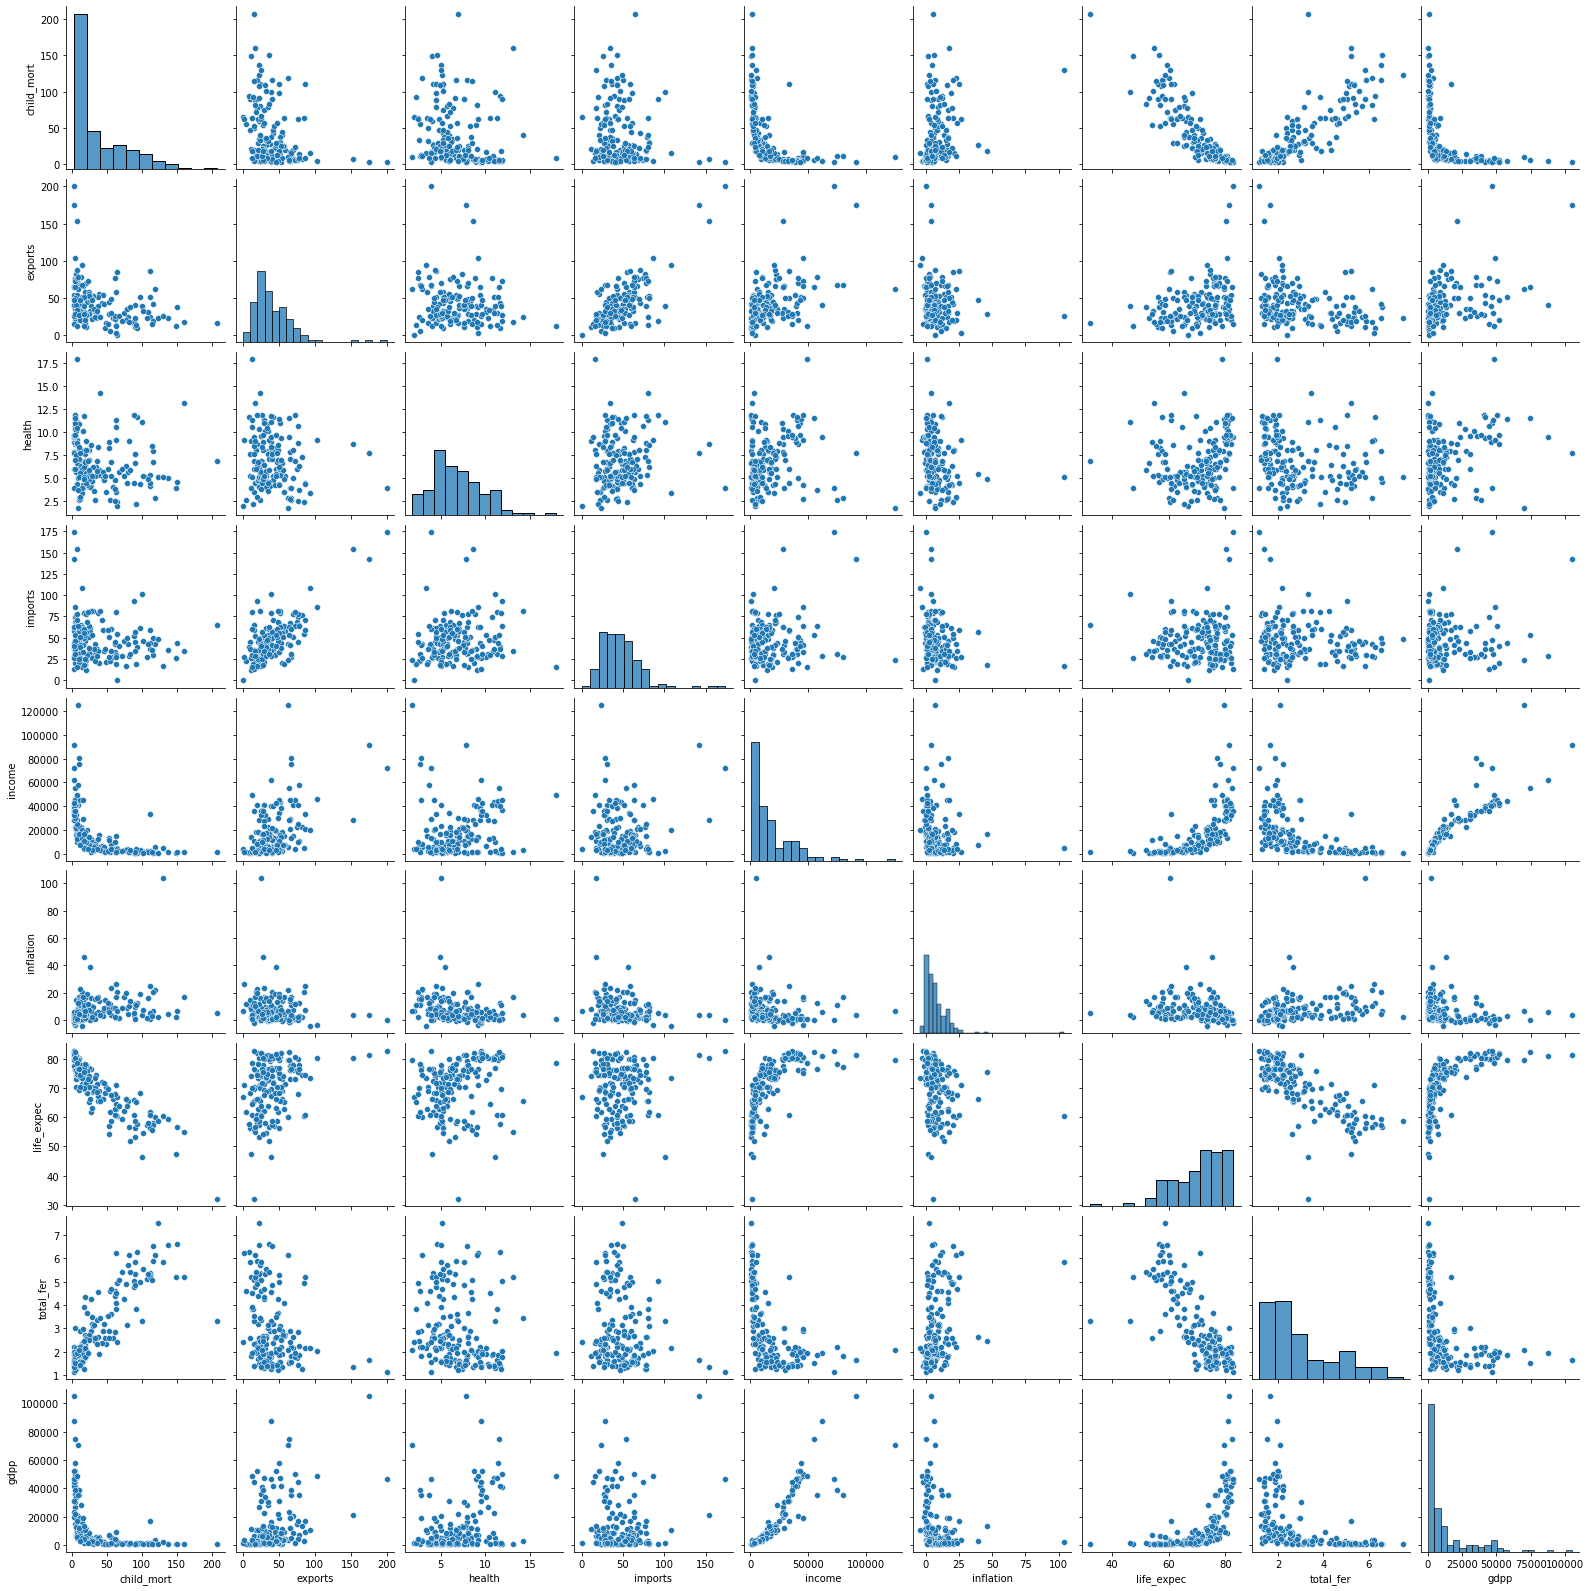

In [91]:
sns.pairplot(df)

### Conclution : 
    If gdpp is HIGH:
        child mortality is LOW
        income is HIGH
        inflation is LOW
        life expectancy is HIGH
        total fertility is LOW
        health, imports and exports are MEDIUM

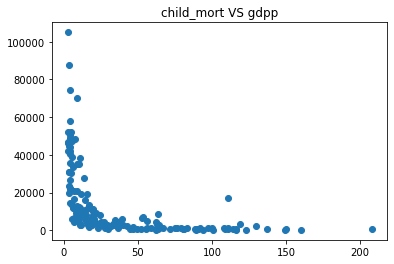

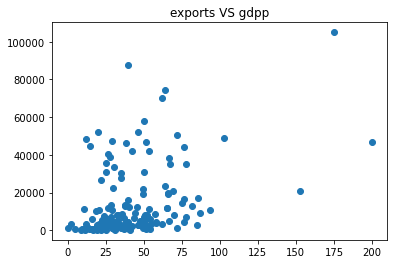

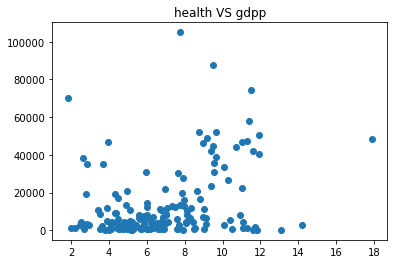

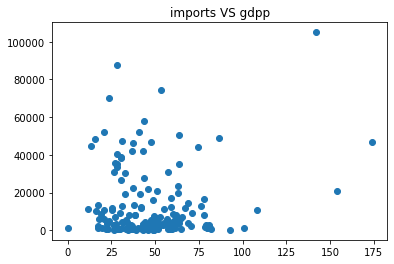

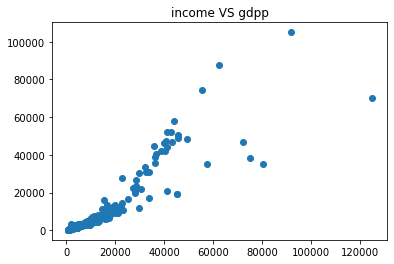

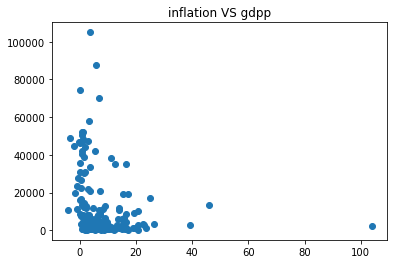

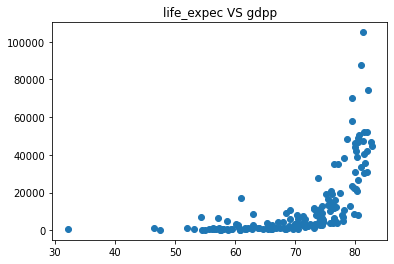

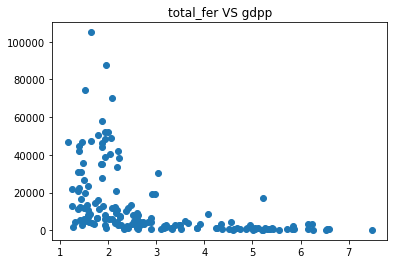

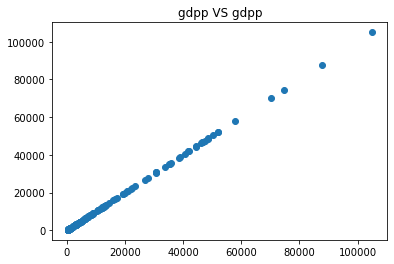

In [42]:
for i in features :
    plt.scatter(df[i], df["gdpp"])
    plt.title(i + " VS gdpp")
    plt.show()

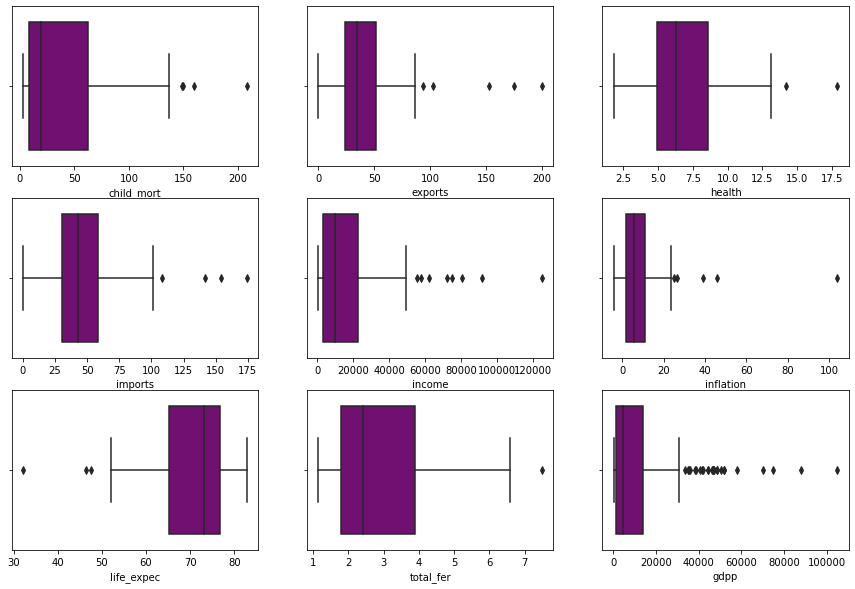

In [105]:
fig  = plt.subplots(nrows = 3,ncols = 3,figsize = (15,10))

for i in range(len(features)) :
    plt.subplot(3,3,i+1)
    ax = sns.boxplot(df[features[i]], color="purple")

plt.show()

# 

## 3-5. Cheching the distributions of features :

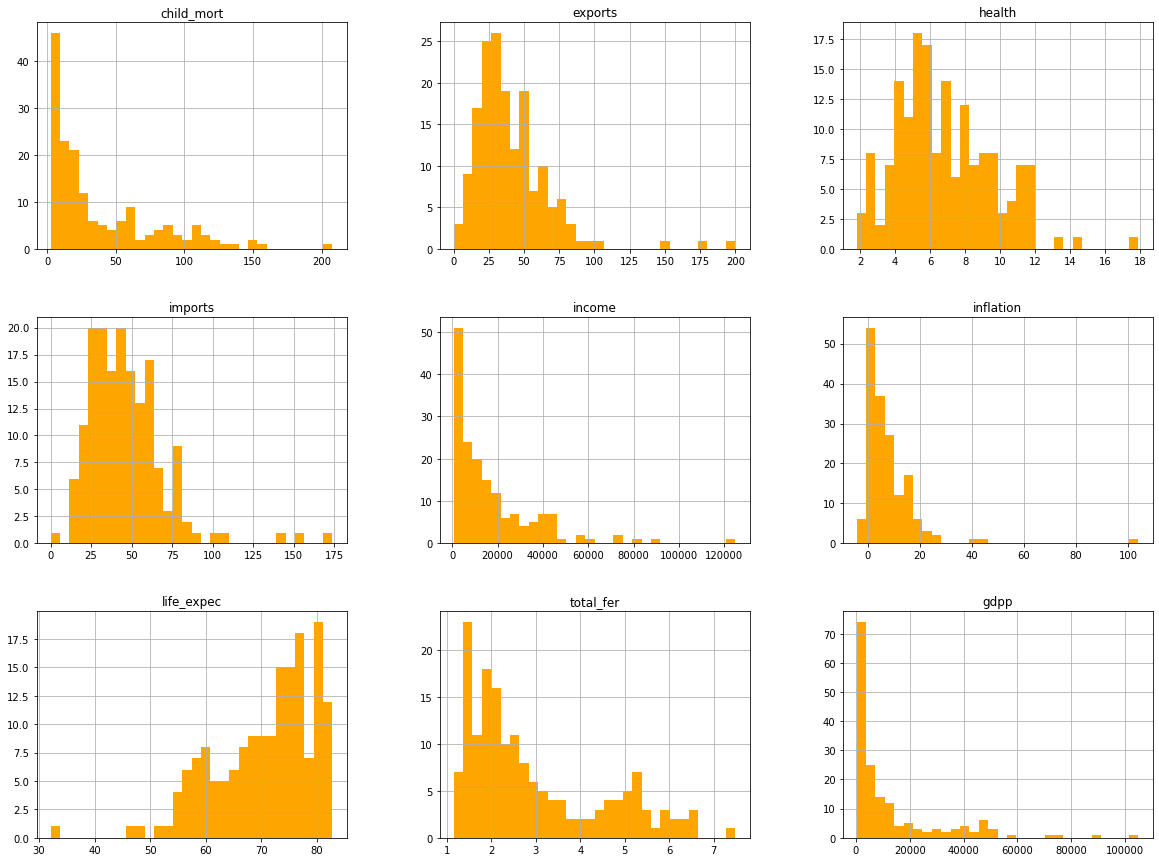

In [106]:
df.hist(bins=30,figsize=(20,15), color="orange")
plt.show()

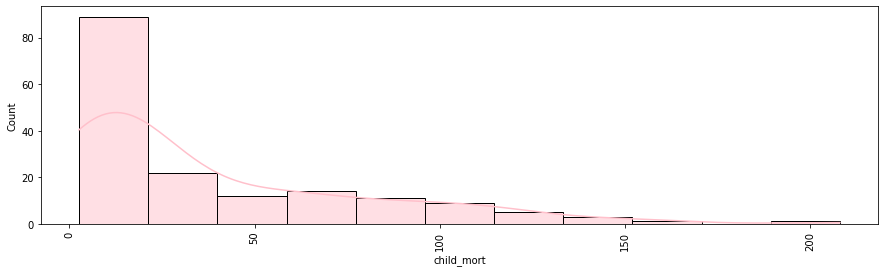

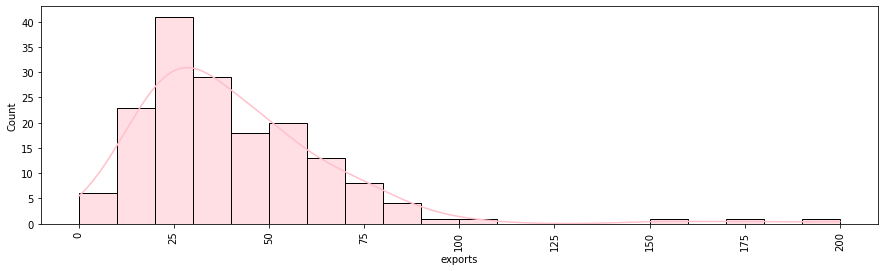

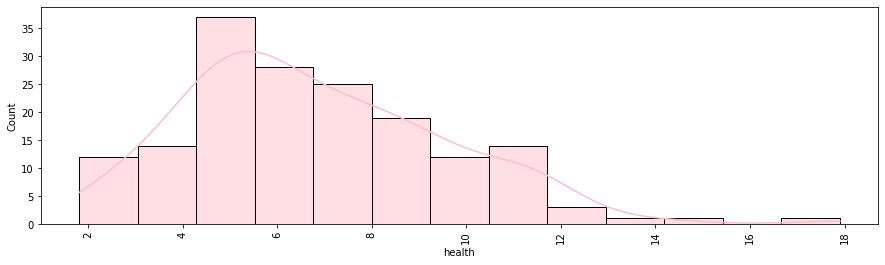

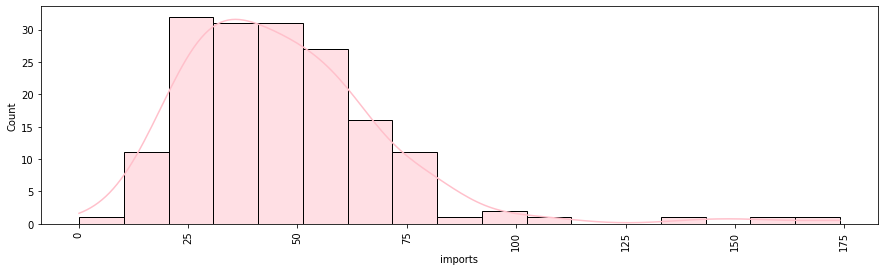

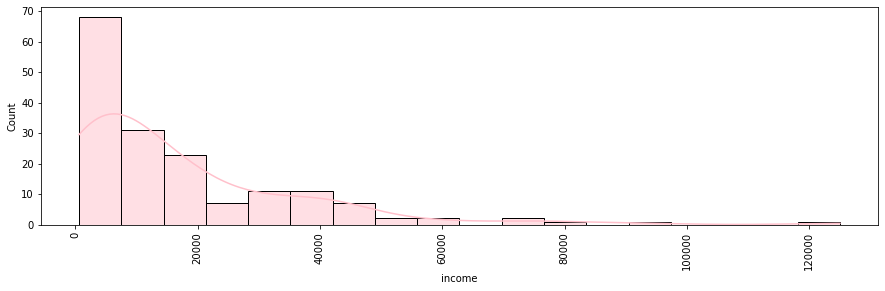

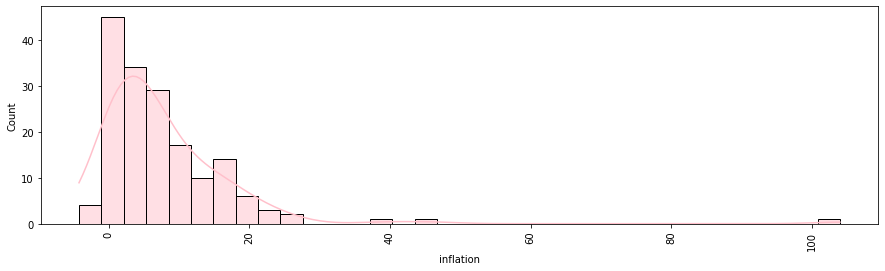

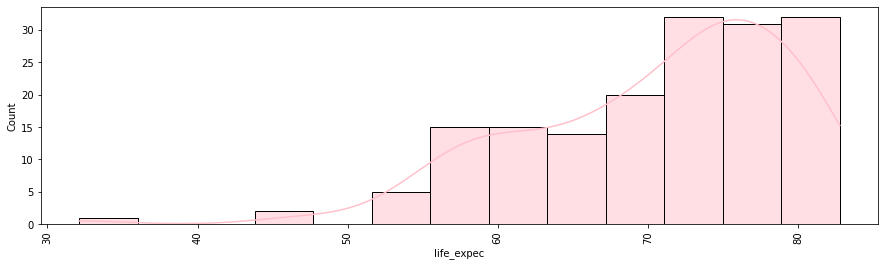

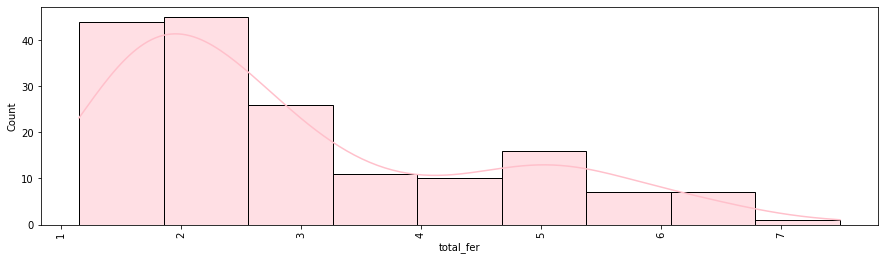

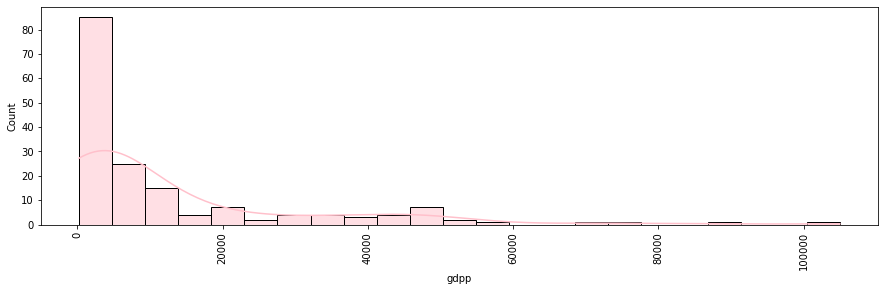

In [102]:
for i in features :
    plt.figure(figsize=(15,4))
    sns.histplot(df[i], kde=True, color='pink')
    plt.xticks(rotation=90)

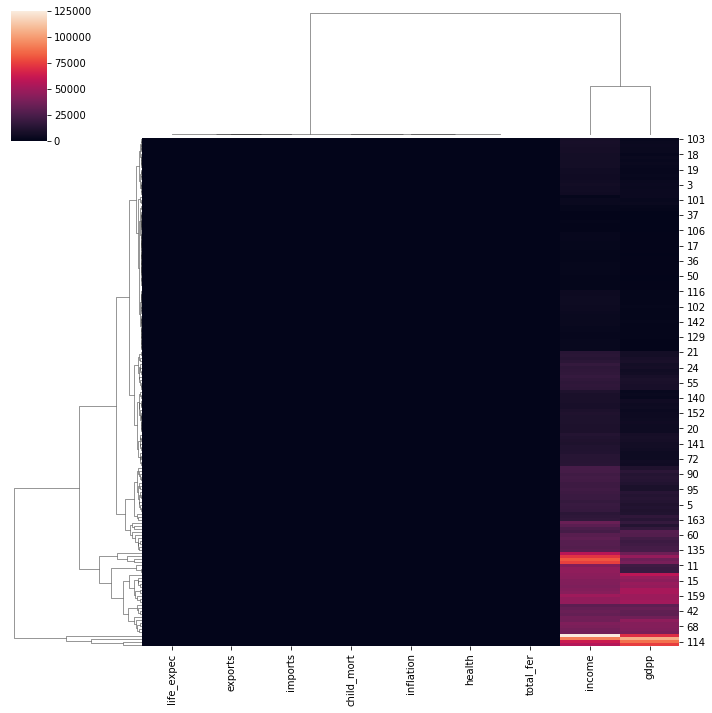

In [93]:
sns.clustermap(df2)

## 3-6. Other visualizations :

In [125]:
mean_child_mort = df["child_mort"].mean()
df_high_child_mort = df[df["child_mort"]>mean_child_mort].sort_values(by="child_mort").tail(10)
df_high_child_mort

# these are 10 top countries which has child_mort more than mean.

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.81,57.9,5.87,575
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
112,Niger,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.00,60.5,5.84,2330
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662


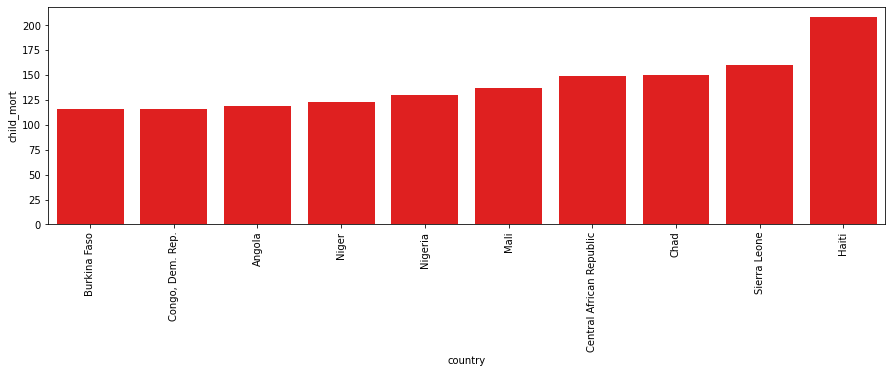

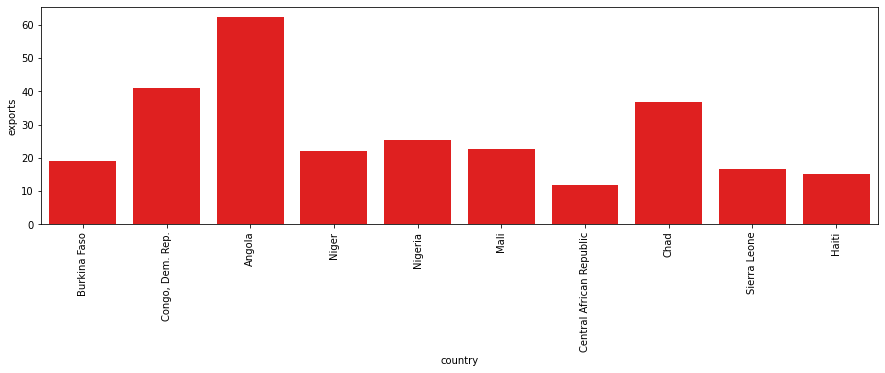

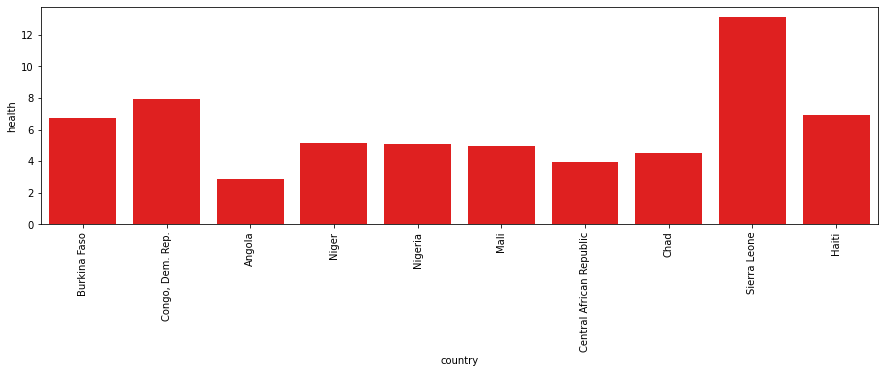

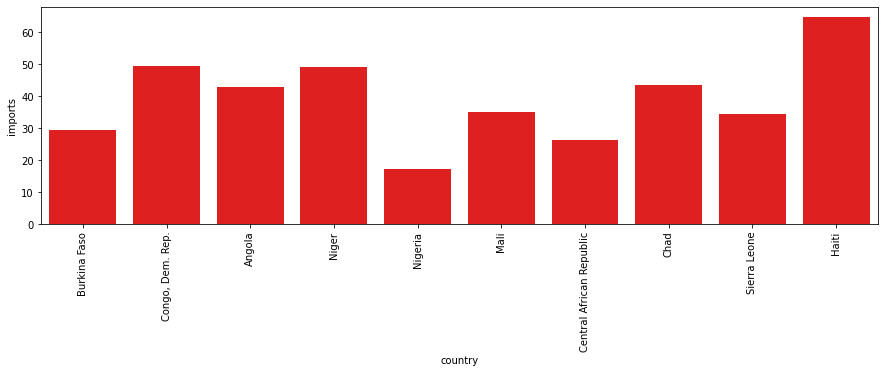

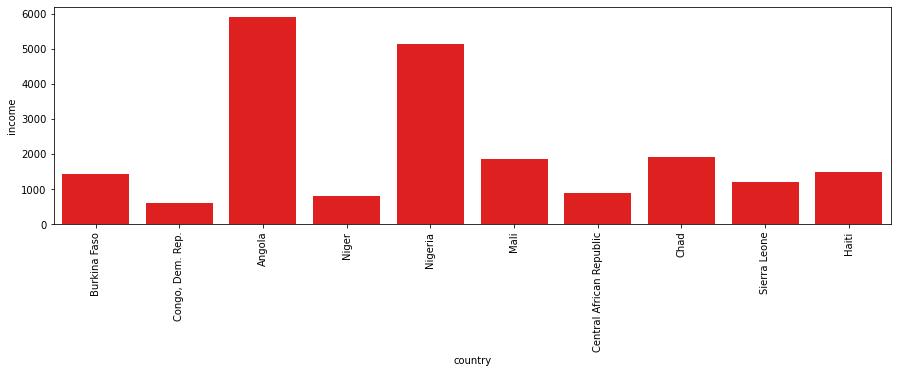

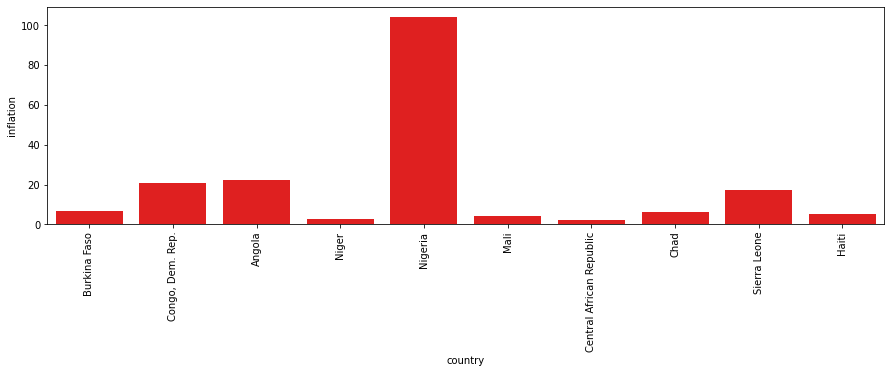

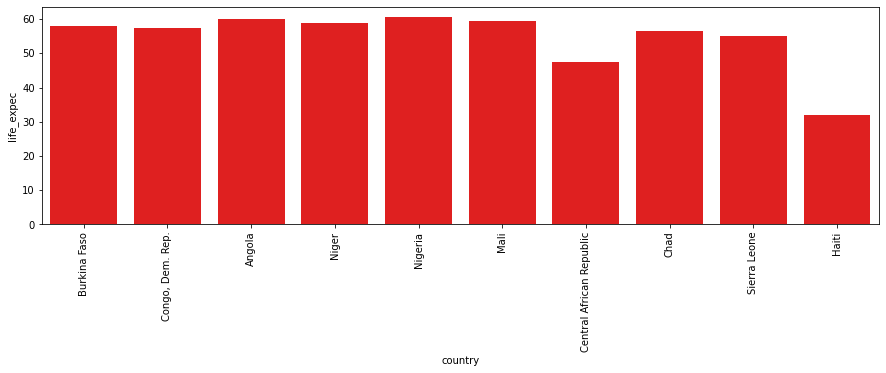

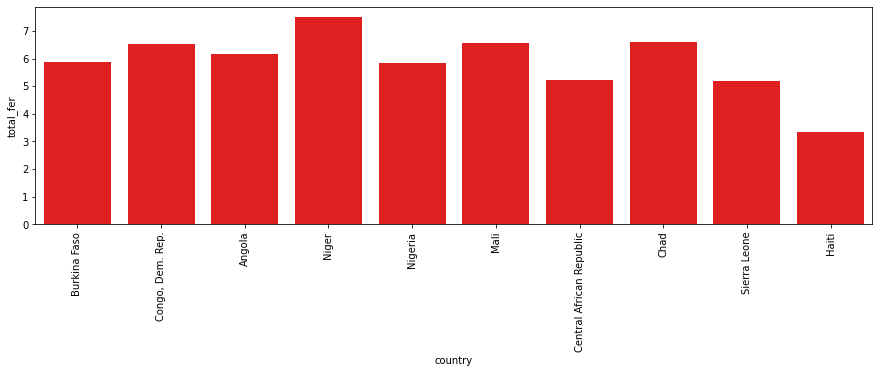

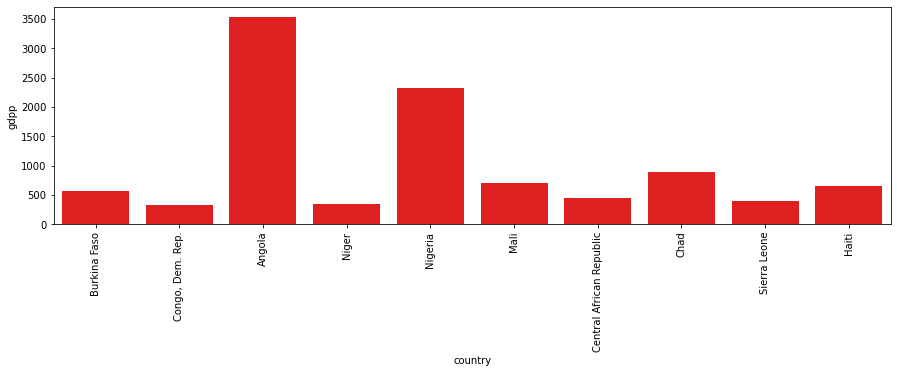

In [131]:
for i in features :
    plt.figure(figsize=(15,4))
    sns.barplot(df_high_child_mort["country"], df_high_child_mort[i] ,color='red')
    plt.xticks(rotation=90)

In [138]:
mean_gdpp = df["gdpp"].mean()
df_high_gdpp = df[df["gdpp"]>mean_gdpp].sort_values(by="gdpp").tail(10)
df_high_gdpp

# these are 10 top countries which has gdpp more than mean.

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
159,United States,7.3,12.4,17.90,15.8,49400,1.220,78.7,1.93,48400
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700
110,Netherlands,4.5,72.0,11.90,63.6,45500,0.848,80.7,1.79,50300
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000


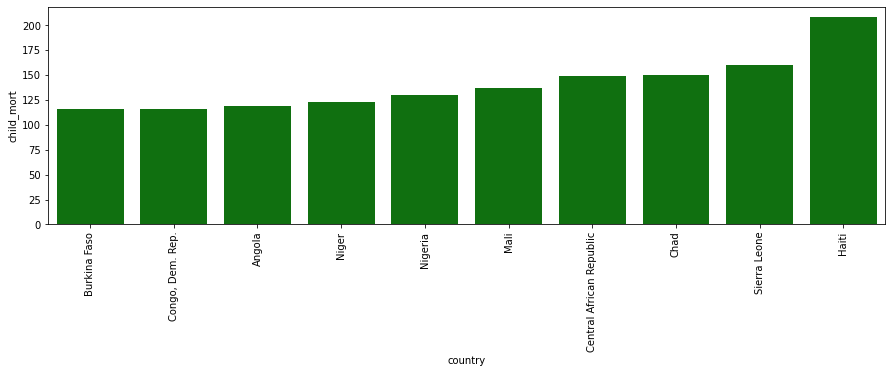

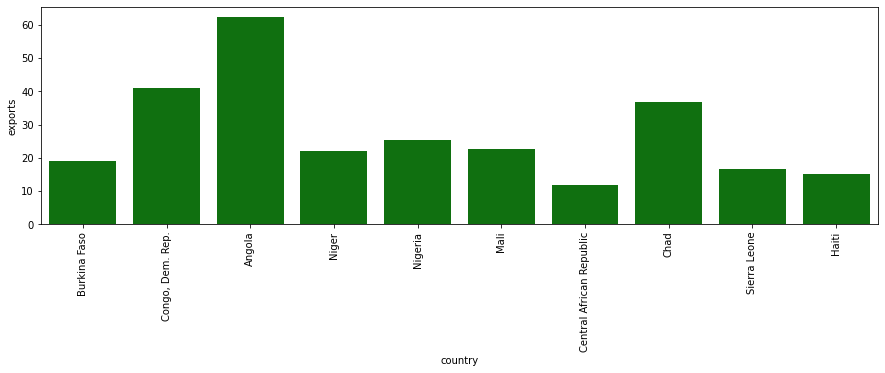

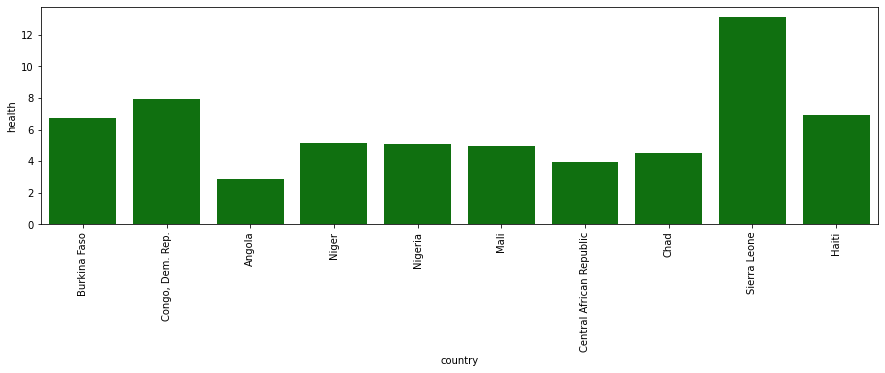

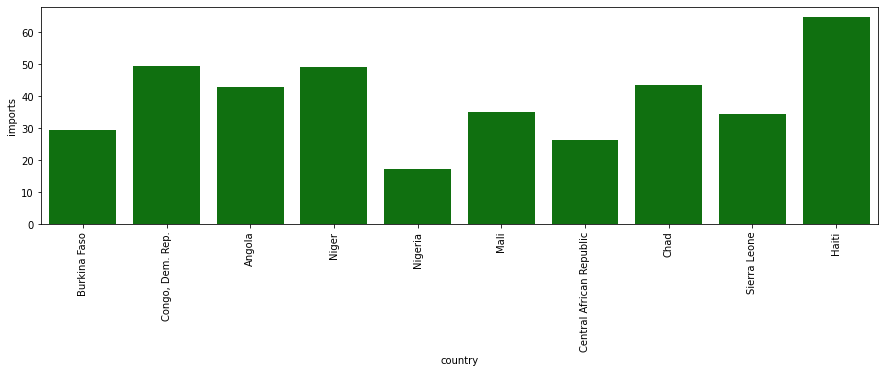

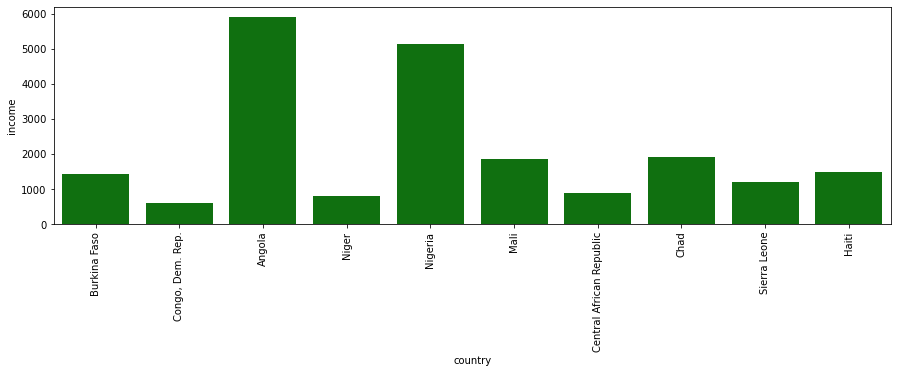

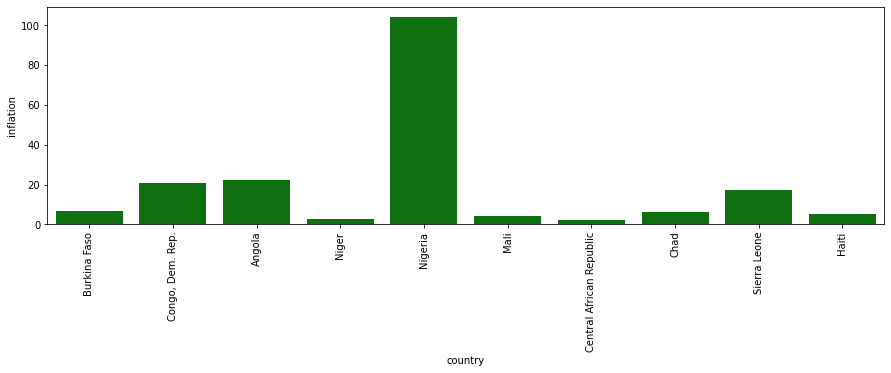

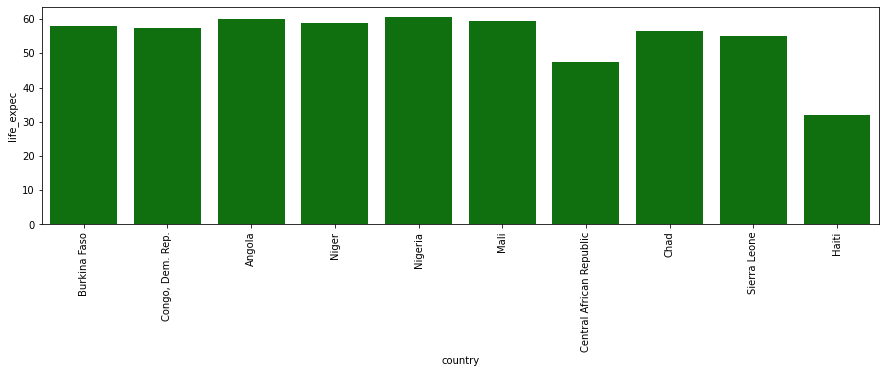

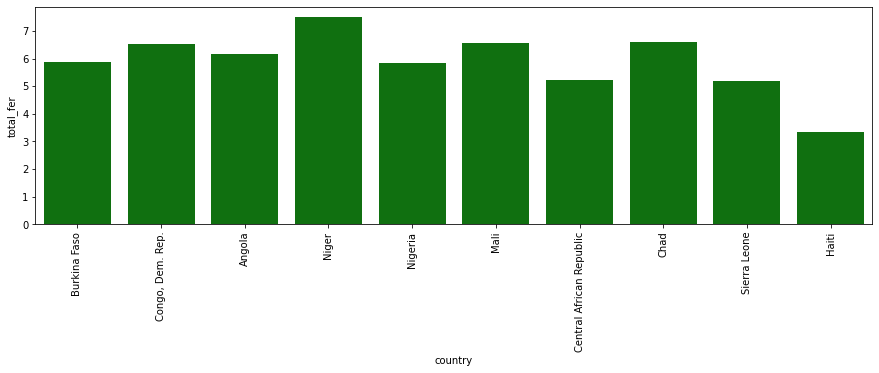

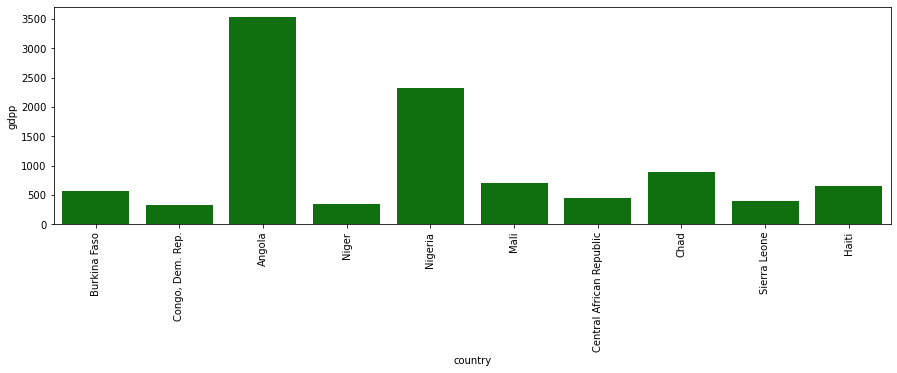

In [139]:
for i in features :
    plt.figure(figsize=(15,4))
    sns.barplot(df_high_child_mort["country"], df_high_child_mort[i] ,color='green')
    plt.xticks(rotation=90)

Text(0.5, 0, 'life_expec')

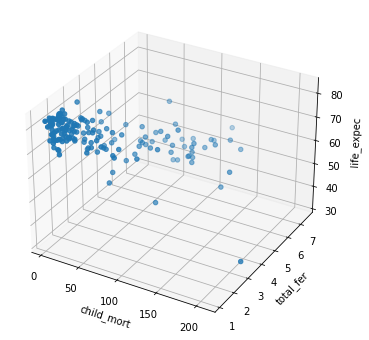

In [6]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["child_mort"], df["total_fer"], df["life_expec"])
ax.set_xlabel("child_mort")
ax.set_ylabel("total_fer")
ax.set_zlabel("life_expec")

# 

# 4. Correlation

<AxesSubplot:>

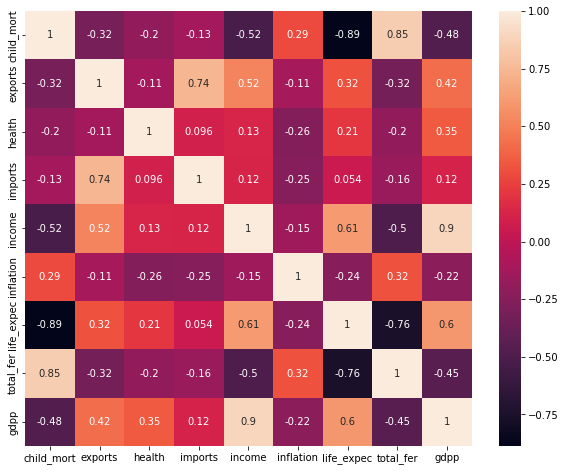

In [89]:
c = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(c, annot=True)

### Conclution :
    1. As we can see, total_fer is highly correlated with child_mort.
    2. gdpp is highly correlated with income.
    3. export and import are highly correlated.

# 

# 5. StandardScaler

In [9]:
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df2)
df_scaled = pd.DataFrame(df_scaled, columns=df2.columns)
df_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [10]:
df_scaled.shape

(167, 9)

# 6. Principal Component Analysis

Principal component analysis (PCA).

Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD.

It uses the LAPACK implementation of the full SVD or a randomized truncated SVD by the method of Halko et al. 2009, depending on the shape of the input data and the number of components to extract.

It can also use the scipy.sparse.linalg ARPACK implementation of the truncated SVD.

Notice that this class does not support sparse input. See TruncatedSVD for an alternative with sparse data.

We start the PCA by starting an instance of it using PCA() and fit it with the scaled country data. The optimal number of Principal compenent are chosen by picking the minimum number of components that demonstrates the highest amount of variance.

In [11]:
pca = PCA()
pca.fit(df_scaled)

PCA()

In [12]:
variance_ratio = pca.explained_variance_ratio_
variance_ratio

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

In [13]:
variance_ratio = variance_ratio*100
variance_ratio

array([45.95173979, 17.18162565, 13.0042589 , 11.05316181,  7.34021142,
        2.48423468,  1.2604304 ,  0.98128174,  0.74305562])

### After PCA, if we use 10 principal component then 99.98% of information is kept.

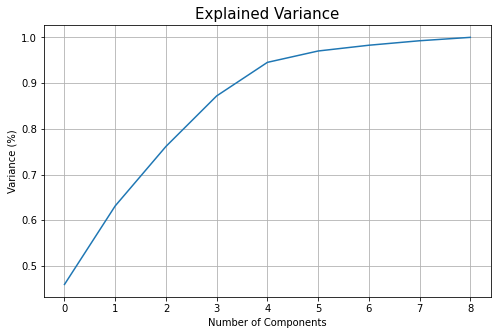

In [18]:
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.title('Explained Variance', fontsize=15)
plt.grid()
plt.show()

### As we can see, n_compenents=5 is optimal and contains 94.97% of all information.

In [14]:
data_pca = PCA(n_components=5, random_state=42)
data_pca.fit(df_scaled)                    # fitting on df_scaled
data_pca = data_pca.transform(df_scaled)   # applying the dimensionality reduction on df_scaled

In [15]:
pca_cols = ['principal component 1', 'principal component 2','principal component 3',
            'principal component 4','principal component 5']

df_pca = pd.DataFrame(data_pca, columns=pca_cols)
df_pca

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475
3,-2.932423,1.695555,1.525044,0.839625,-0.273209
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007
...,...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595,-0.395748
163,-0.551036,-1.233886,3.101350,-0.115311,2.082581
164,0.498524,1.390744,-0.238526,-1.074098,1.176081
165,-1.887451,-0.109453,1.109752,0.056257,0.618365


### Now we have a DataFrame of the given data which is divided to 5 clusters.

<AxesSubplot:>

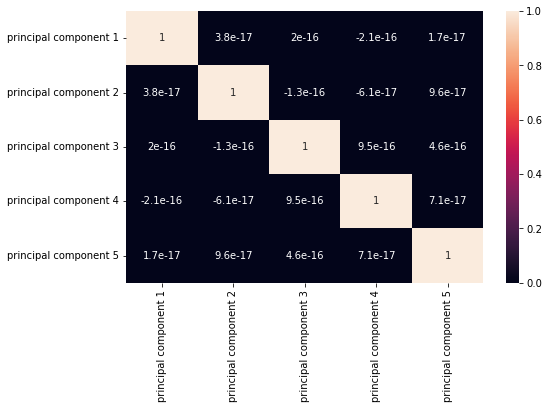

In [21]:
plt.figure(figsize=(8,5))
sns.heatmap(df_pca.corr(), annot=True)

# 7. Clustering

# 7-1. KMeans : 

K-means clustering is one of the popular unsupervised machine learning algorithms. The algorithm iteratively divides data points into K clusters by minimizing the variance in each cluster.

In [22]:
inertia_list = []

for k in range(1,10) : 
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=300, n_init=10, init="random")
    kmeans.fit(df_pca)
    inertia_list.append(kmeans.inertia_)

In [62]:
inertia_list

[1420.800893392859,
 968.4663525507148,
 749.6189390258892,
 618.8958865727373,
 550.214785093666,
 493.7210943713155,
 436.4065520535087,
 405.67605014319497,
 379.0525076130466]

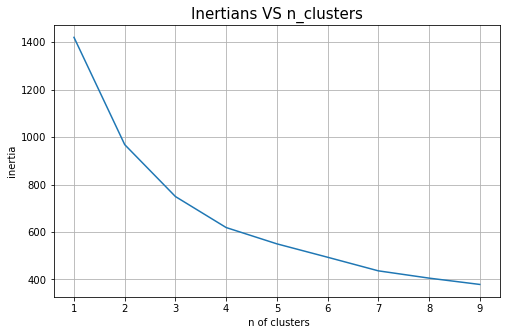

In [68]:
plt.figure(figsize=(8,5))
plt.plot(range(1,10), inertia_list)
plt.xticks(range(1,10))
plt.xlabel(" n of clusters")
plt.ylabel("inertia")
plt.title("Inertians VS n_clusters", fontsize=15)
plt.grid()
plt.show()

In [64]:
k1 = KneeLocator(range(1,10), inertia_list, curve="convex", direction="decreasing")
k1.elbow

4

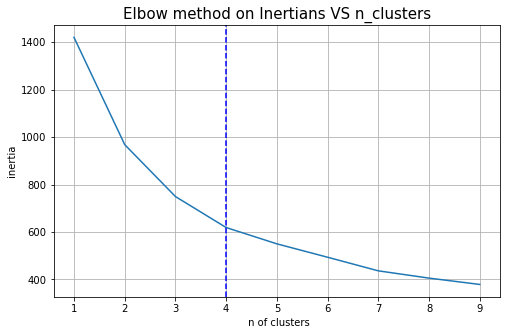

In [69]:
plt.figure(figsize=(8,5))
plt.plot(range(1,10), inertia_list)
plt.xticks(range(1,10))
plt.grid()
plt.xlabel(" n of clusters")
plt.ylabel("inertia")
plt.title("Elbow method on Inertians VS n_clusters", fontsize=15)
plt.axvline(x=k1.elbow, color='b', label="anxline - full height", ls='--')
            
plt.show()

## Silhouette_score and calinski_harabasz_coef

#### Silhouette_score
Compute the mean Silhouette Coefficient of all samples.

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

In [66]:
sillhouette_coef = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=300, n_init=10, init="random")  
    kmeans.fit(df_pca)
    score = silhouette_score(df_pca, kmeans.labels_)
    sillhouette_coef.append(score)

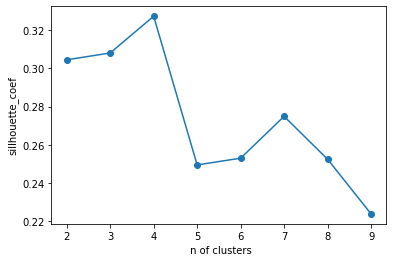

In [70]:
plt.plot(range(2,10), sillhouette_coef, marker='o')
plt.xticks(range(2,10))
plt.xlabel(" n of clusters")
plt.ylabel("sillhouette_coef")
            
plt.show()

# 

#### calinski_harabasz_coef
Compute the Calinski and Harabasz score. It is also known as the Variance Ratio Criterion. The score is defined as ratio of the sum of between-cluster dispersion and of within-cluster dispersion.

In [67]:
calinski_harabasz_coef = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=300, n_init=10, init="random")
    kmeans.fit(df_pca)
    score = calinski_harabasz_score(df_pca, kmeans.labels_)
    calinski_harabasz_coef.append(score)

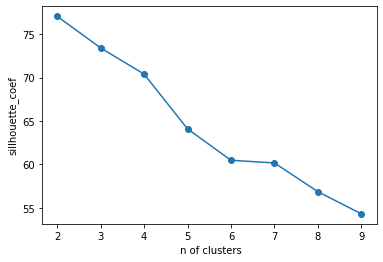

In [71]:
plt.plot(range(2,10), calinski_harabasz_coef, marker='o')
plt.xticks(range(2,10))
plt.xlabel(" n of clusters")
plt.ylabel("sillhouette_coef")
            
plt.show()

### I am choosing 4 as the number of clusters.

# 

In [16]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=300, n_init=10, init="random")  
kmeans.fit(df_pca)

KMeans(init='random', n_clusters=4, random_state=42)

In [17]:
df['cluster'] = kmeans.labels_

In [18]:
df["cluster"].unique()      # we have 4 clusters.

array([3, 0, 2, 1])

In [19]:
dbs_kmeans = metrics.davies_bouldin_score(df2, kmeans.labels_)
slc_kmeans = metrics.silhouette_score(df2, kmeans.labels_)
chc_kmeans = metrics.calinski_harabasz_score(df2, kmeans.labels_)

In [20]:
df[df["cluster"]==0].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.0
mean,21.389655,41.290678,6.235862,48.038689,12968.620690,7.413460,72.935632,2.286552,6919.103448,0.0
std,13.821462,19.523129,2.158742,20.083366,8870.376775,7.808165,3.947474,0.696392,5453.932294,0.0
min,3.400000,0.109000,1.970000,0.065900,1780.000000,-4.210000,61.700000,1.250000,592.000000,0.0
25%,11.000000,26.900000,4.885000,32.700000,6705.000000,2.320000,70.350000,1.705000,2970.000000,0.0
50%,18.100000,37.700000,5.980000,49.200000,10500.000000,5.730000,73.800000,2.200000,5020.000000,0.0
75%,27.700000,52.050000,7.525000,61.300000,17600.000000,9.905000,76.100000,2.655000,10500.000000,0.0
max,64.400000,93.800000,14.200000,108.000000,45400.000000,45.900000,80.400000,4.340000,28000.000000,0.0


In [21]:
df[df["cluster"]==1].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0
mean,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667,1.0
std,2.309401,23.515952,2.492877,16.165808,32460.642836,2.179718,1.205543,0.240624,43011.665084,0.0
min,2.800000,153.000000,3.960000,142.000000,28300.000000,-0.046000,80.300000,1.150000,21100.000000,1.0
25%,2.800000,164.000000,5.865000,148.000000,50200.000000,1.787000,80.800000,1.255000,33850.000000,1.0
50%,2.800000,175.000000,7.770000,154.000000,72100.000000,3.620000,81.300000,1.360000,46600.000000,1.0
75%,4.800000,187.500000,8.210000,164.000000,81900.000000,3.725000,82.000000,1.495000,75800.000000,1.0
max,6.800000,200.000000,8.650000,174.000000,91700.000000,3.830000,82.700000,1.630000,105000.000000,1.0


In [22]:
df[df["cluster"]==2].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
count,30.000000,30.000000,30.000000,30.000000,30.0000,30.000000,30.000000,30.000000,30.000000,30.0
mean,4.953333,45.826667,9.168667,39.736667,45250.0000,2.742200,80.376667,1.795333,43333.333333,2.0
std,2.159140,21.736255,3.266299,17.455134,19785.3089,4.266366,1.440231,0.369293,15040.114942,0.0
min,2.600000,12.400000,1.810000,13.600000,27200.0000,-3.220000,76.500000,1.230000,22100.000000,2.0
25%,3.825000,28.425000,8.785000,28.025000,34375.0000,0.650500,79.825000,1.465000,34025.000000,2.0
50%,4.200000,44.250000,9.535000,35.000000,40550.0000,1.190000,80.400000,1.865000,41850.000000,2.0
75%,5.100000,63.575000,11.000000,47.400000,45650.0000,3.205000,81.400000,1.972500,48625.000000,2.0
max,10.800000,103.000000,17.900000,86.500000,125000.0000,16.700000,82.800000,3.030000,87800.000000,2.0


In [23]:
df[df["cluster"]==3].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.0
mean,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979,3.0
std,33.375229,18.160597,2.662015,17.732741,5641.790360,15.509958,6.443521,1.041382,2956.103925,0.0
min,36.900000,2.200000,2.200000,17.200000,609.000000,0.885000,32.100000,2.590000,231.000000,3.0
25%,63.800000,16.950000,4.520000,29.800000,1390.000000,4.010000,56.650000,4.535000,550.000000,3.0
50%,90.200000,23.800000,5.660000,40.300000,1870.000000,8.920000,59.500000,5.060000,897.000000,3.0
75%,111.000000,38.200000,8.105000,49.450000,3675.000000,16.600000,62.850000,5.635000,1470.000000,3.0
max,208.000000,85.800000,13.100000,101.000000,33700.000000,104.000000,71.100000,7.490000,17100.000000,3.0


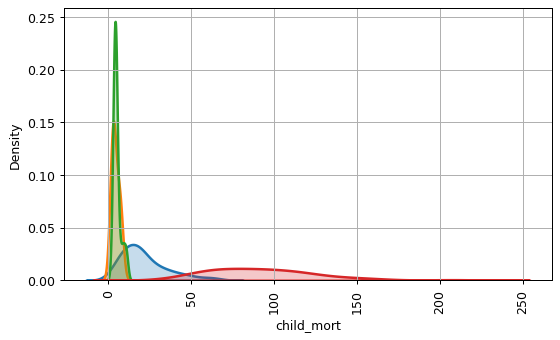

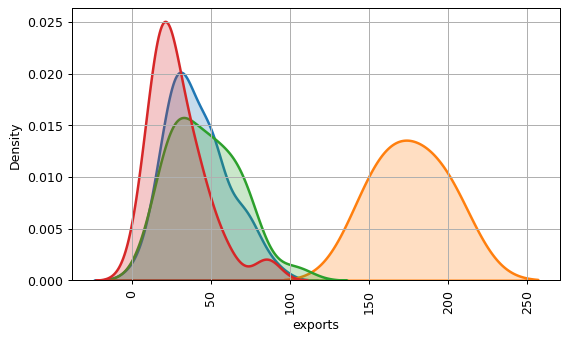

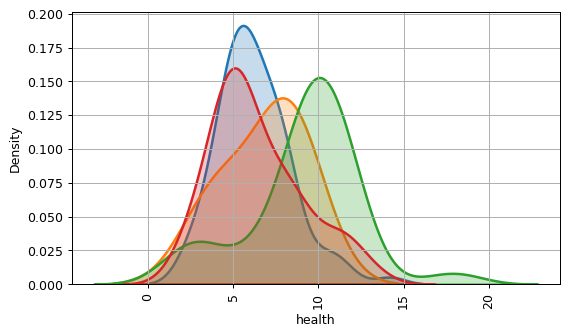

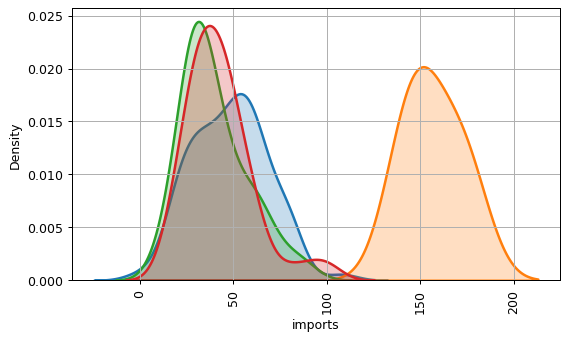

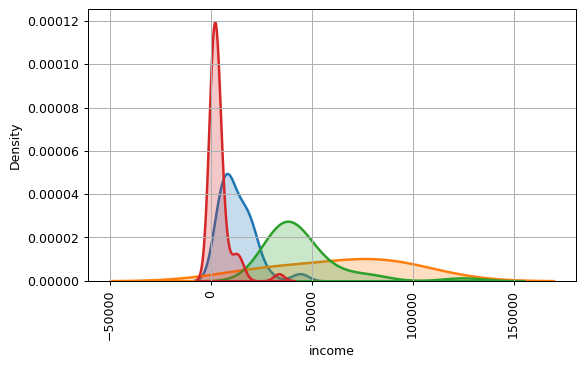

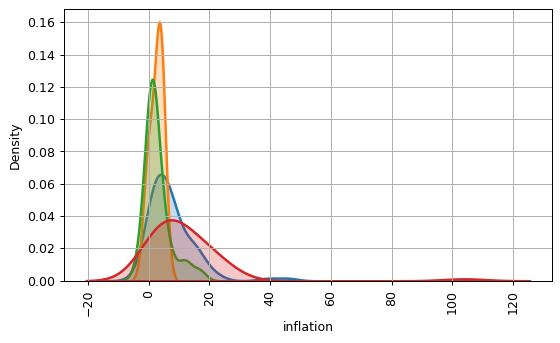

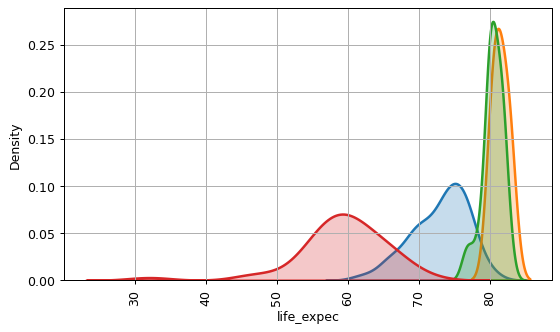

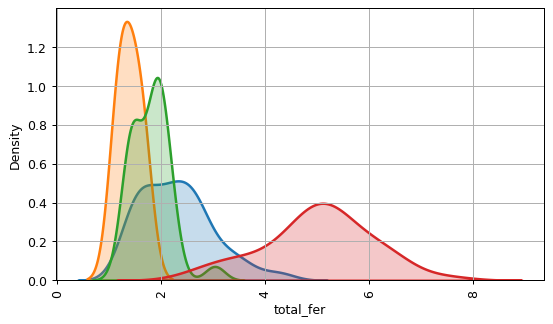

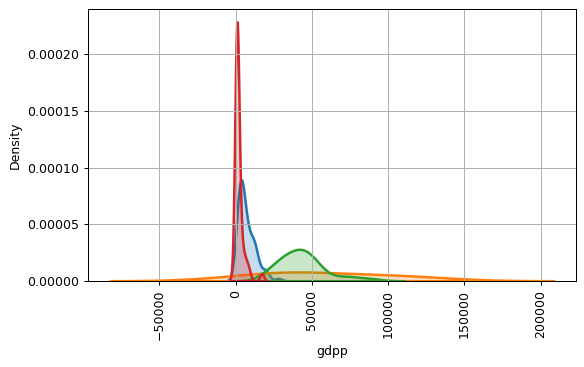

In [96]:
names = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']


for col in names :
    plt.figure(figsize=(7,4), dpi=90)
    sns.kdeplot(data=df[df["cluster"]==0], x=col, fill=True, linewidth=2, label='0')
    sns.kdeplot(data=df[df["cluster"]==1], x=col, fill=True, linewidth=2, label='1')
    sns.kdeplot(data=df[df["cluster"]==2], x=col, fill=True, linewidth=2, label='2')
    sns.kdeplot(data=df[df["cluster"]==3], x=col, fill=True, linewidth=2, label='3')
    plt.xticks(rotation=90)
    plt.grid()

Text(0.5, 1.0, 'Number of countries in each cluster')

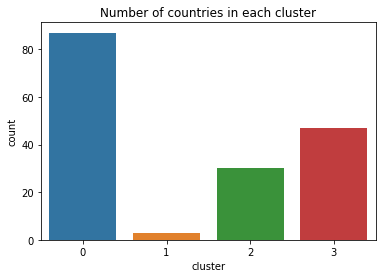

In [24]:
sns.countplot(x="cluster", data=df)
plt.title("Number of countries in each cluster")

In [25]:
df["cluster"].value_counts()

0    87
3    47
2    30
1     3
Name: cluster, dtype: int64

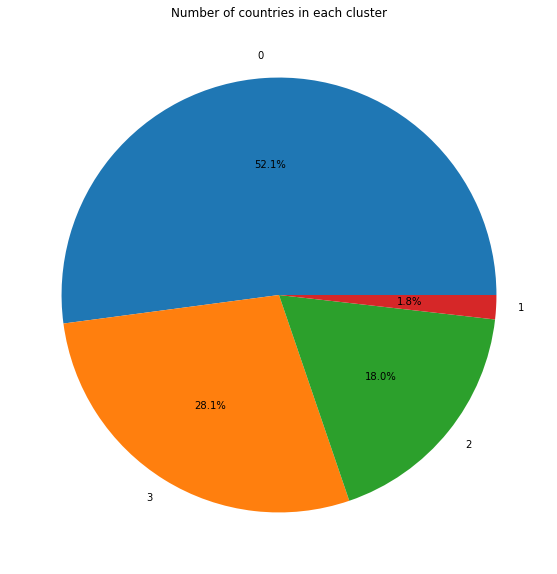

In [26]:
s = df["cluster"].value_counts()

plt.figure(figsize=(10,10))
plt.pie(s,labels = s.index, autopct='%1.1f%%')
plt.title("Number of countries in each cluster")
plt.show()

### PCA Clustering using KMeans algorithm :
    1. There are 4 clusters.
    2. Cluster 1 has the smallest amount of countries(samples).
    3. Cluster 0 has the largest amount of countris(samples).
   

# 

# 

# 

# 

# 

# 

# 7-2 . Hierarchical 

Hierarchical clustering is a general family of clustering algorithms that build nested clusters by merging or splitting them successively. This hierarchy of clusters is represented as a tree (or dendrogram). The root of the tree is the unique cluster that gathers all the samples, the leaves being the clusters with only one sample. See the Wikipedia page for more details.

The AgglomerativeClustering object performs a hierarchical clustering using a bottom up approach: each observation starts in its own cluster, and clusters are successively merged together. The linkage criteria determines the metric used for the merge strategy:

Ward minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.

Maximum or complete linkage minimizes the maximum distance between observations of pairs of clusters.

Average linkage minimizes the average of the distances between all observations of pairs of clusters.

Single linkage minimizes the distance between the closest observations of pairs of clusters.

In [27]:
agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(df_pca)

df['Hierarchical cluster'] = agglom.labels_

In [28]:
df["Hierarchical cluster"].unique()      # we have 4 clusters.

array([0, 2, 1, 3, 4], dtype=int64)

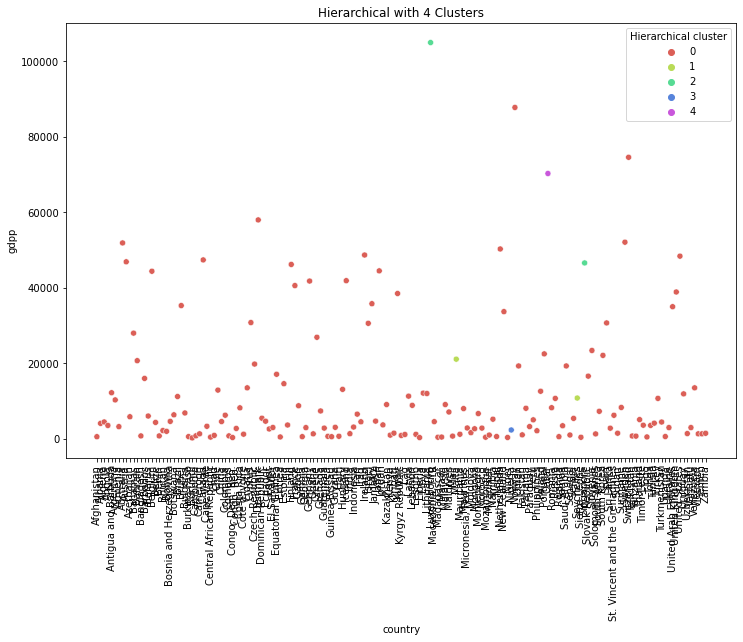

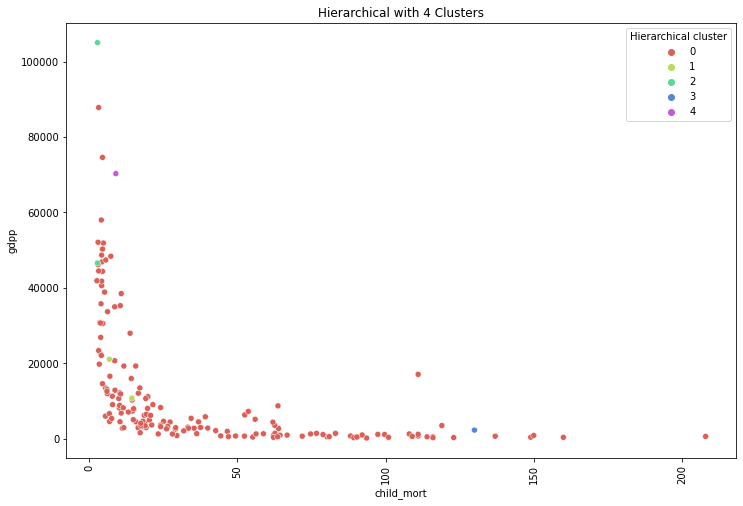

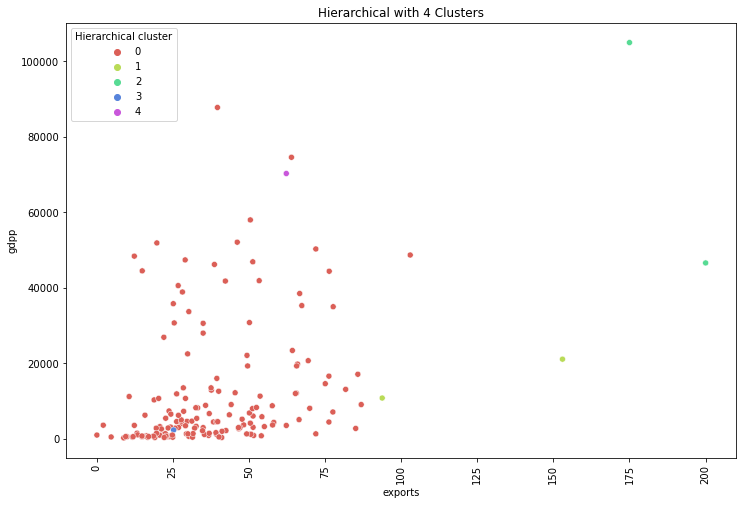

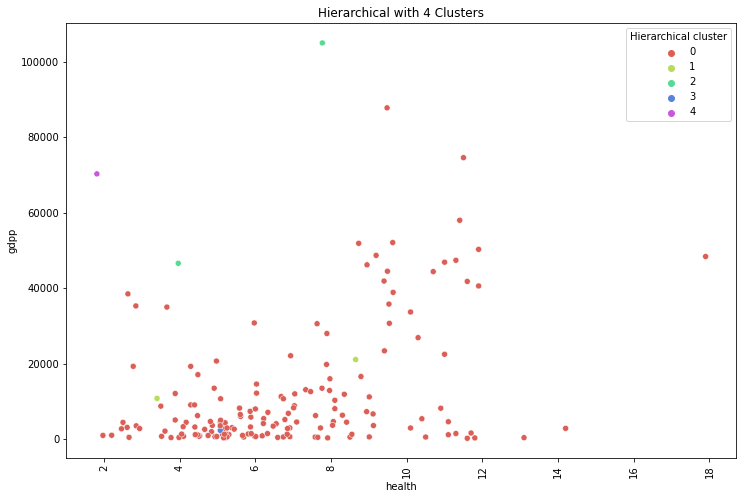

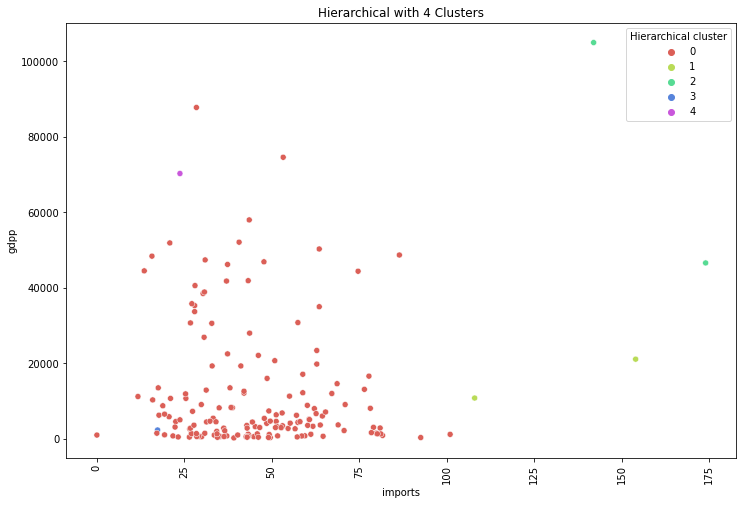

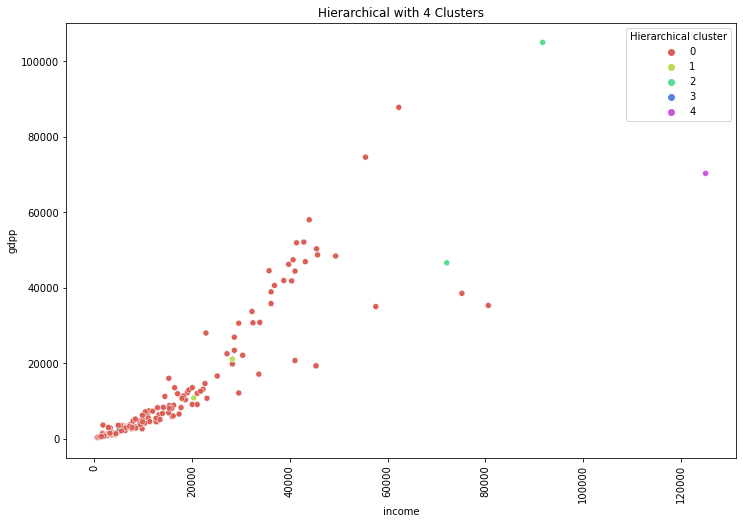

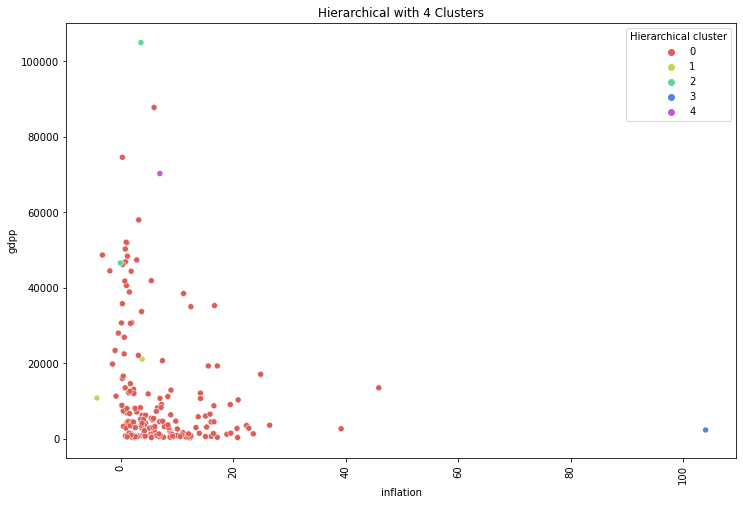

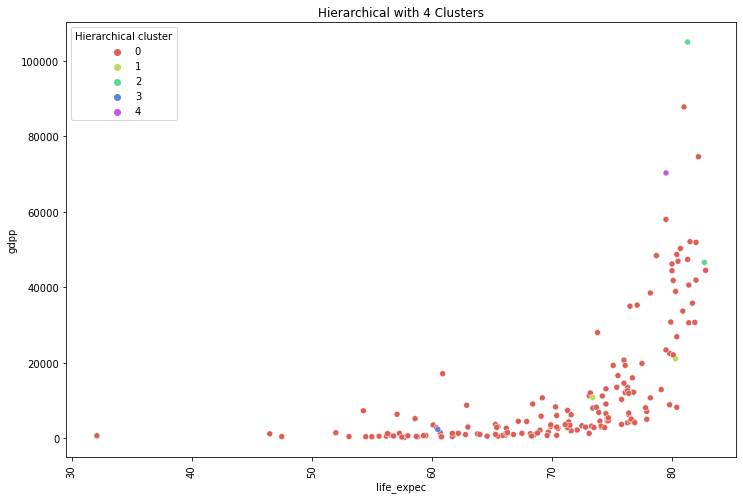

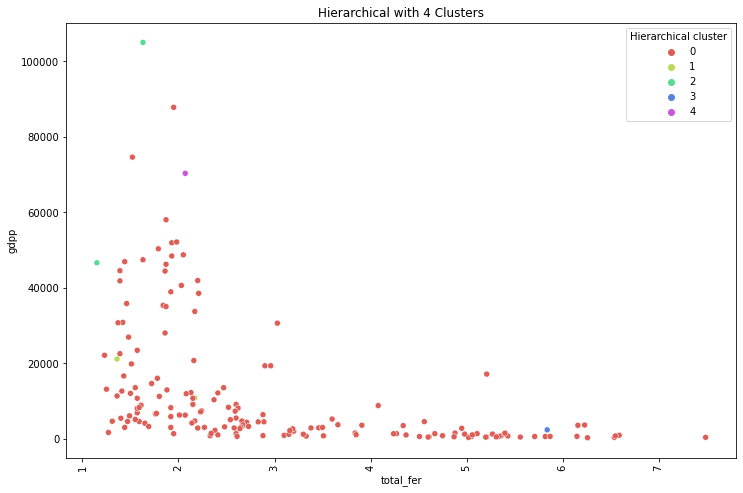

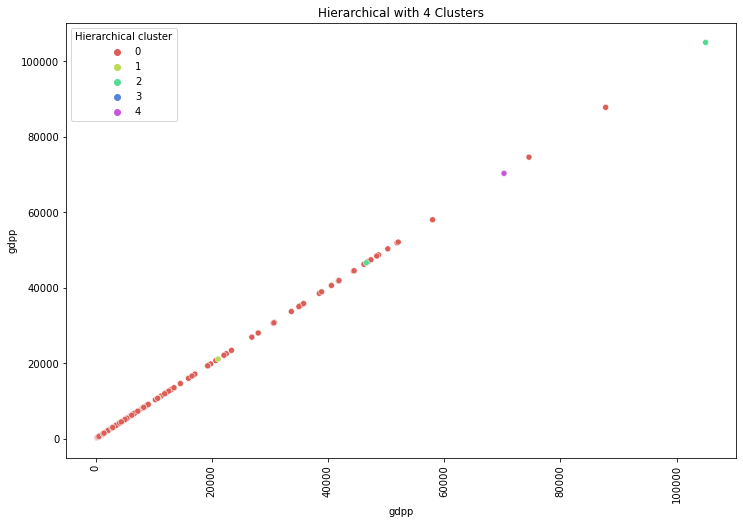

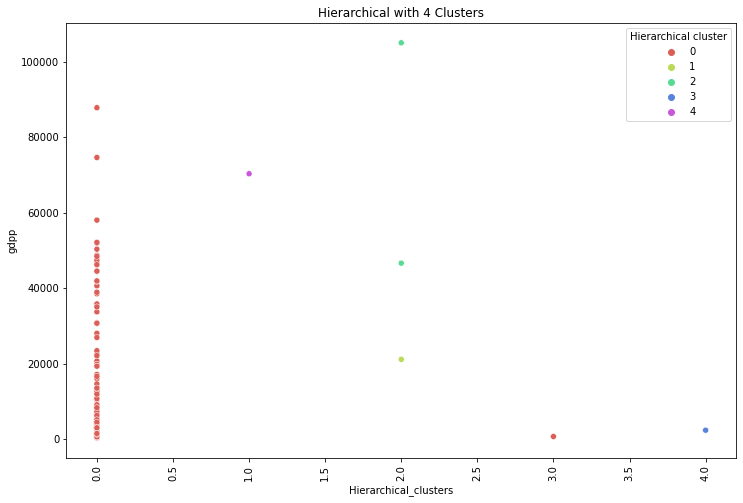

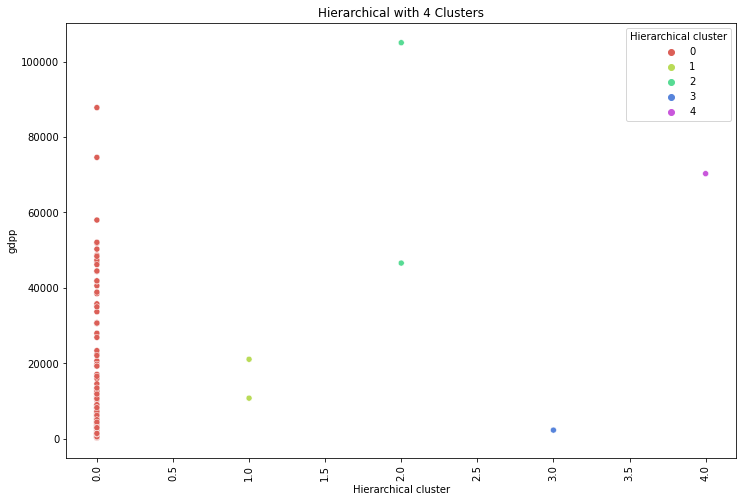

In [82]:
for col in df.columns : 
    plt.figure(figsize=(12, 8))
    sns.scatterplot(df[col], df['gdpp'], hue=df['Hierarchical cluster'], 
                 palette=sns.color_palette('hls', 5))
    plt.xticks(rotation=90)
    plt.title('Hierarchical with 4 Clusters')
    plt.show()

In [66]:
dist = distance_matrix(df2, df2)
print(dist)

[[    0.          9040.96071291 11947.14069887 ...  2979.48366502

   2968.49182888  1900.67511061]

 [ 9040.96071291     0.          2993.06874697 ...  6109.42286769

   6118.2624461   7151.56709877]

 [11947.14069887  2993.06874697     0.         ...  8980.76622413

   8989.99232472 10077.10919701]

 ...

 [ 2979.48366502  6109.42286769  8980.76622413 ...     0.

     72.28003874  1222.41284147]

 [ 2968.49182888  6118.2624461   8989.99232472 ...    72.28003874

      0.          1209.79871756]

 [ 1900.67511061  7151.56709877 10077.10919701 ...  1222.41284147

   1209.79871756     0.        ]]


## metrics

In [29]:
dbs_agglom = metrics.davies_bouldin_score(df2, agglom.labels_)
slc_agglom = metrics.silhouette_score(df2, agglom.labels_)
chc_agglom = metrics.calinski_harabasz_score(df2, agglom.labels_)

## predict

In [30]:
pred_agglom = agglom.fit_predict(df_scaled)
pred_agglom

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [31]:
df[df["Hierarchical cluster"]==0].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,Hierarchical cluster
count,161.00000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.0
mean,38.66646,38.234776,6.879255,44.791714,15655.360248,7.362683,70.342236,2.969503,11856.422360,1.217391,0.0
std,40.04789,20.037047,2.738199,18.501991,15977.623614,7.509961,8.865055,1.506490,16297.122146,1.349517,0.0
min,2.60000,0.109000,1.970000,0.065900,609.000000,-3.220000,32.100000,1.230000,231.000000,0.000000,0.0
25%,8.60000,23.500000,4.970000,30.400000,3320.000000,1.850000,65.300000,1.840000,1310.000000,0.000000,0.0
50%,19.80000,35.000000,6.330000,43.200000,9930.000000,5.440000,72.800000,2.470000,4560.000000,0.000000,0.0
75%,62.20000,50.600000,8.730000,57.500000,21800.000000,10.900000,76.700000,3.910000,13100.000000,3.000000,0.0
max,208.00000,103.000000,17.900000,101.000000,80600.000000,45.900000,82.800000,7.490000,87800.000000,3.000000,0.0


In [32]:
df[df["Hierarchical cluster"]==1].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,Hierarchical cluster
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.0
mean,10.600000,123.400000,6.025000,131.000000,24350.000000,-0.190000,76.850000,1.765000,15950.000000,0.500000,1.0
std,5.374012,41.860721,3.712311,32.526912,5586.143571,5.685139,4.879037,0.572756,7283.199846,0.707107,0.0
min,6.800000,93.800000,3.400000,108.000000,20400.000000,-4.210000,73.400000,1.360000,10800.000000,0.000000,1.0
25%,8.700000,108.600000,4.712500,119.500000,22375.000000,-2.200000,75.125000,1.562500,13375.000000,0.250000,1.0
50%,10.600000,123.400000,6.025000,131.000000,24350.000000,-0.190000,76.850000,1.765000,15950.000000,0.500000,1.0
75%,12.500000,138.200000,7.337500,142.500000,26325.000000,1.820000,78.575000,1.967500,18525.000000,0.750000,1.0
max,14.400000,153.000000,8.650000,154.000000,28300.000000,3.830000,80.300000,2.170000,21100.000000,1.000000,1.0


In [33]:
df[df["Hierarchical cluster"]==2].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,Hierarchical cluster
count,2.0,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.0,2.0
mean,2.8,187.50000,5.865000,158.000000,81900.000000,1.787000,82.000000,1.390000,75800.000000,1.0,2.0
std,0.0,17.67767,2.694077,22.627417,13859.292911,2.592253,0.989949,0.339411,41295.036021,0.0,0.0
min,2.8,175.00000,3.960000,142.000000,72100.000000,-0.046000,81.300000,1.150000,46600.000000,1.0,2.0
25%,2.8,181.25000,4.912500,150.000000,77000.000000,0.870500,81.650000,1.270000,61200.000000,1.0,2.0
50%,2.8,187.50000,5.865000,158.000000,81900.000000,1.787000,82.000000,1.390000,75800.000000,1.0,2.0
75%,2.8,193.75000,6.817500,166.000000,86800.000000,2.703500,82.350000,1.510000,90400.000000,1.0,2.0
max,2.8,200.00000,7.770000,174.000000,91700.000000,3.620000,82.700000,1.630000,105000.000000,1.0,2.0


In [34]:
df[df["Hierarchical cluster"]==3].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,Hierarchical cluster
count,1.0,1.0,1.00,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0
mean,130.0,25.3,5.07,17.4,5150.0,104.0,60.5,5.84,2330.0,3.0,3.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,130.0,25.3,5.07,17.4,5150.0,104.0,60.5,5.84,2330.0,3.0,3.0
25%,130.0,25.3,5.07,17.4,5150.0,104.0,60.5,5.84,2330.0,3.0,3.0
50%,130.0,25.3,5.07,17.4,5150.0,104.0,60.5,5.84,2330.0,3.0,3.0
75%,130.0,25.3,5.07,17.4,5150.0,104.0,60.5,5.84,2330.0,3.0,3.0
max,130.0,25.3,5.07,17.4,5150.0,104.0,60.5,5.84,2330.0,3.0,3.0


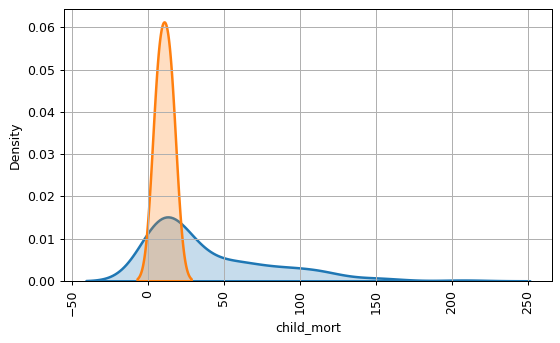

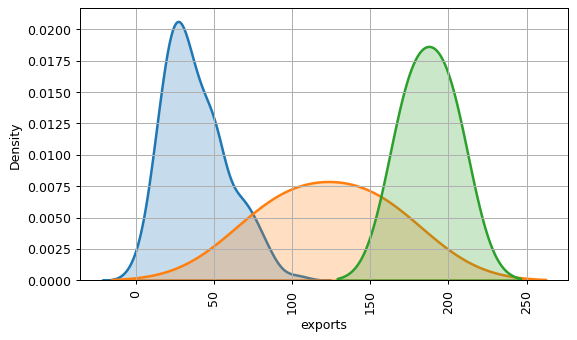

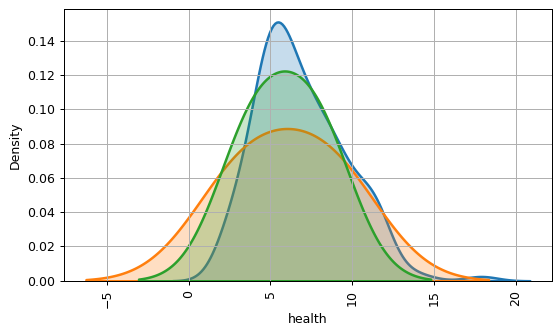

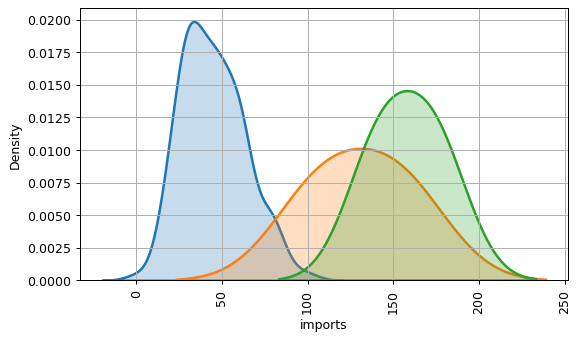

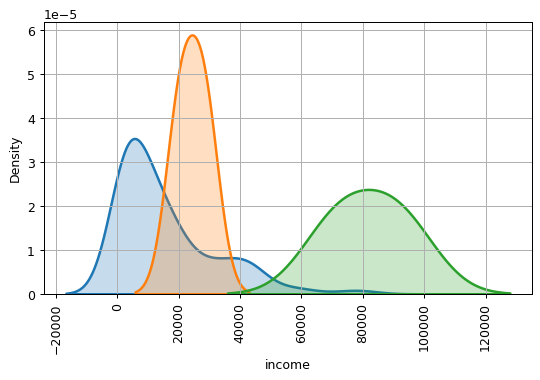

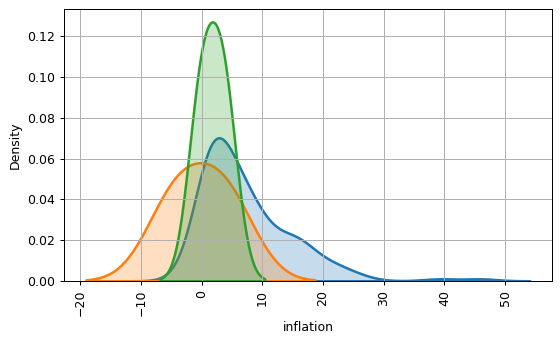

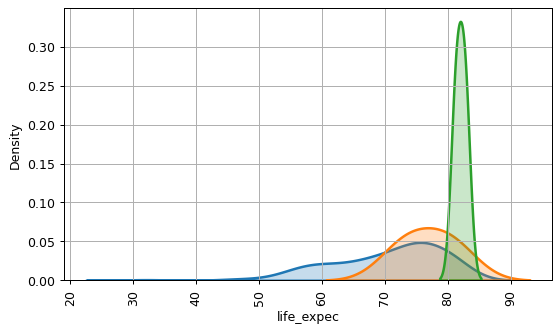

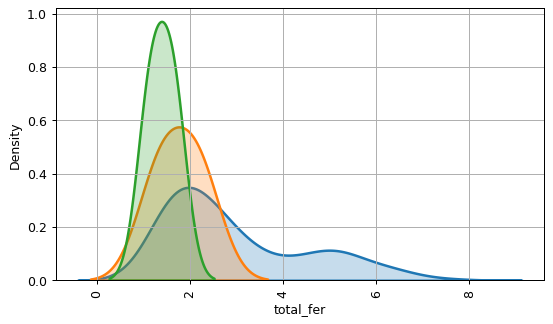

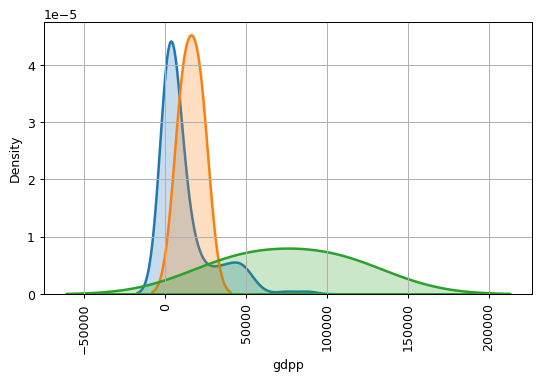

In [35]:
names = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']


for col in names :
    plt.figure(figsize=(7,4), dpi=90)
    sns.kdeplot(data=df[df["Hierarchical cluster"]==0], x=col, fill=True, linewidth=2, label='0')
    sns.kdeplot(data=df[df["Hierarchical cluster"]==1], x=col, fill=True, linewidth=2, label='1')
    sns.kdeplot(data=df[df["Hierarchical cluster"]==2], x=col, fill=True, linewidth=2, label='2')
    sns.kdeplot(data=df[df["Hierarchical cluster"]==3], x=col, fill=True, linewidth=2, label='3')
    plt.xticks(rotation=90)
    plt.grid()

Text(0.5, 1.0, 'Number of countries in each cluster')

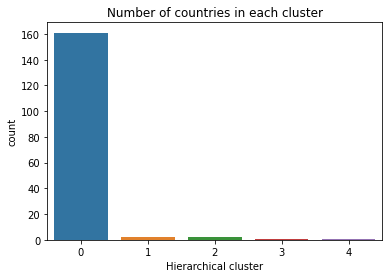

In [36]:
sns.countplot(x="Hierarchical cluster", data=df)
plt.title("Number of countries in each cluster")

In [37]:
pd.Series(pred_agglom).value_counts()

0    161
2      3
4      1
3      1
1      1
dtype: int64

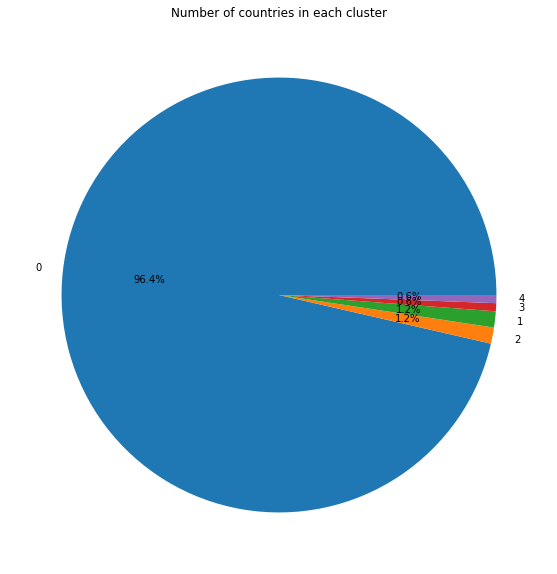

In [38]:
s = df["Hierarchical cluster"].value_counts()

plt.figure(figsize=(10,10))
plt.pie(s,labels = s.index, autopct='%1.1f%%')
plt.title("Number of countries in each cluster")
plt.show()

### PCA Clustering using Hierarchical algorithm :
1. There are 4 clusters.
2. Cluster 4 has the smallest amount of countries(samples).
3. Cluster 0 has the largest amount of countris(samples).

# 

# 

# 

# 

# 7-3. Mean-Shift

Mean shift clustering using a flat kernel.
Mean shift clustering aims to discover “blobs” in a smooth density of samples. It is a centroid-based algorithm, which works by updating candidates for centroids to be the mean of the points within a given region. These candidates are then filtered in a post-processing stage to eliminate near-duplicates to form the final set of centroids.

Seeding is performed using a binning technique for scalability.

In [41]:
bandwidth = estimate_bandwidth(df_pca, quantile=0.3)
bandwidth

2.763616153451763

In [42]:
msh = MeanShift(bandwidth=bandwidth, bin_seeding=True)
msh.fit(df_pca)

labels = msh.labels_
cluster_centers = msh.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
pred_msh = msh.predict(df_pca)

In [43]:
df["MeanShift cluster"] = msh.labels_

In [44]:
df["MeanShift cluster"].unique()

array([0, 3, 4, 1, 5, 2], dtype=int64)

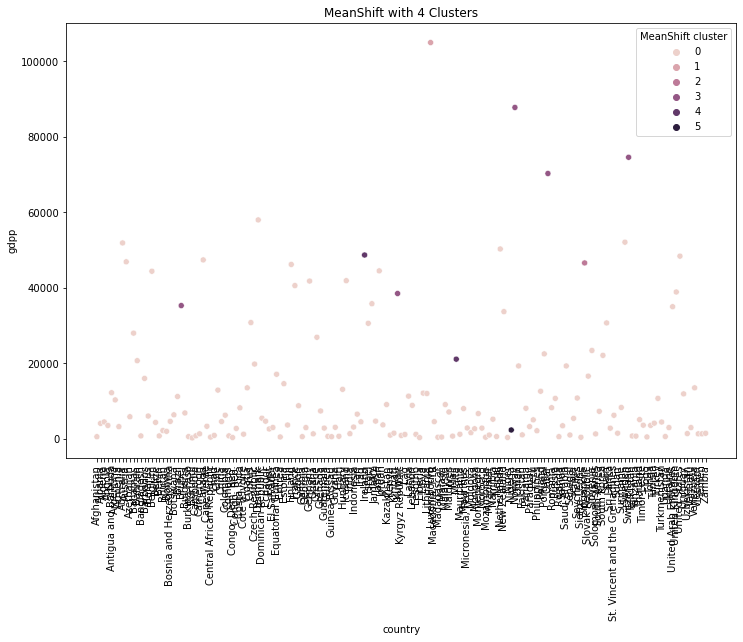

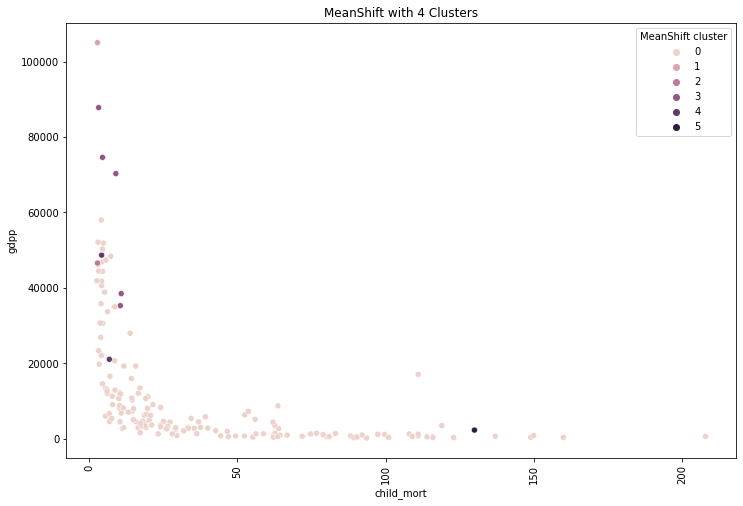

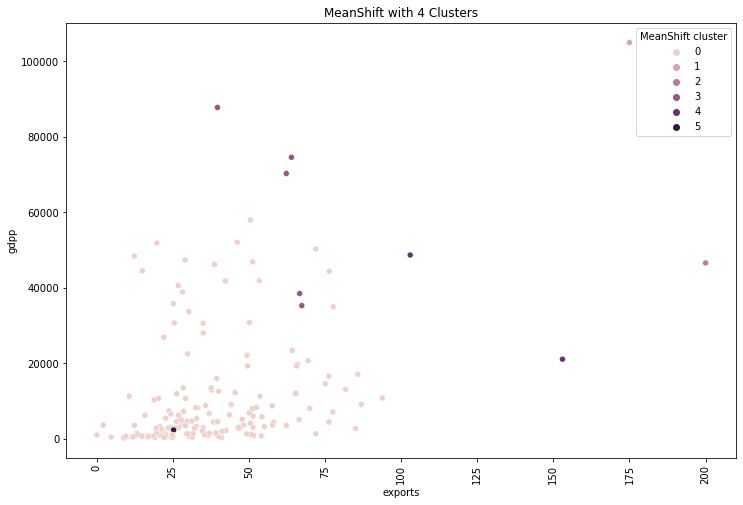

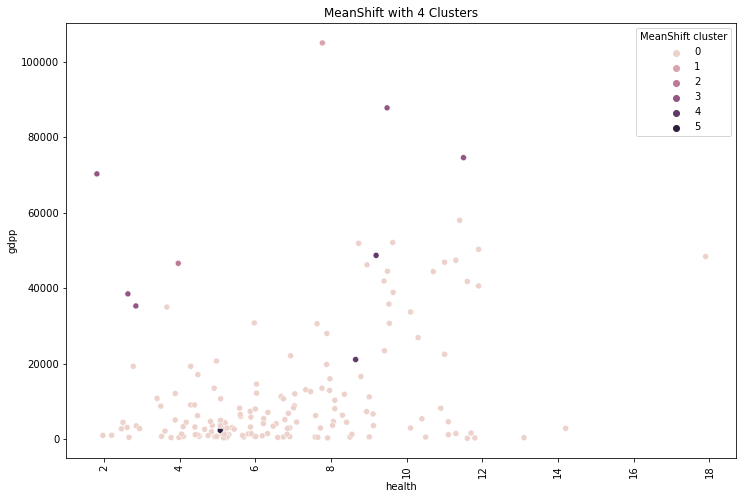

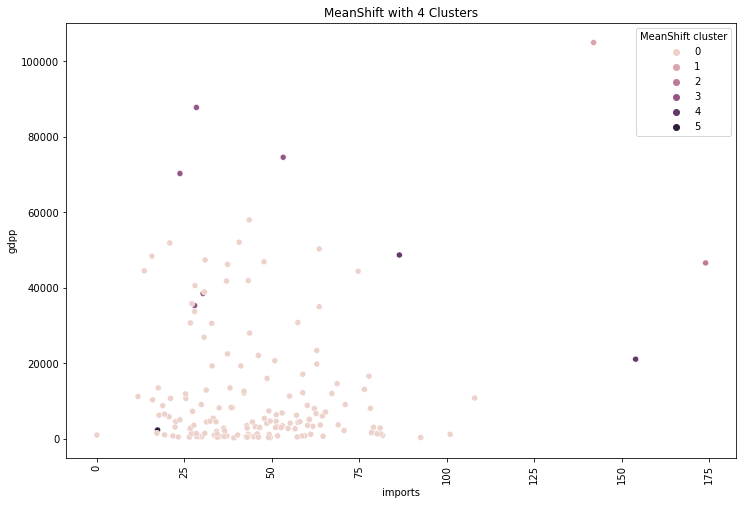

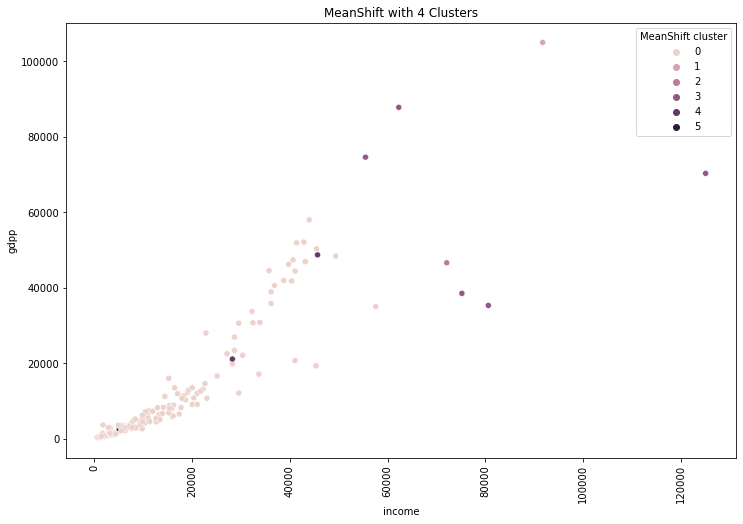

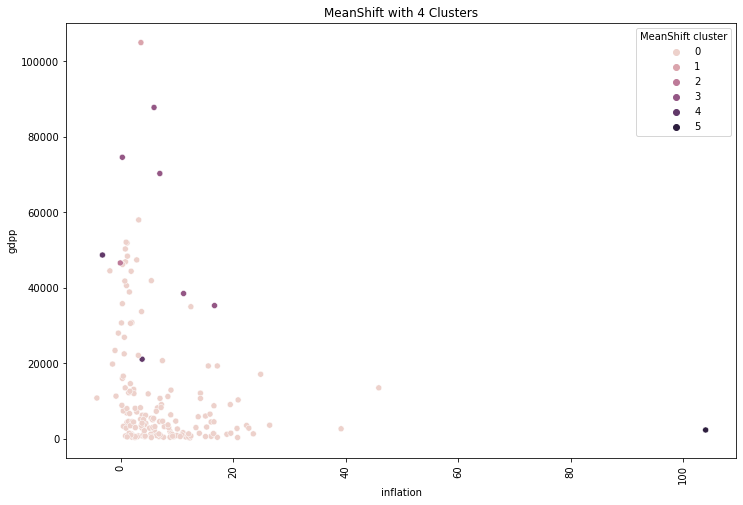

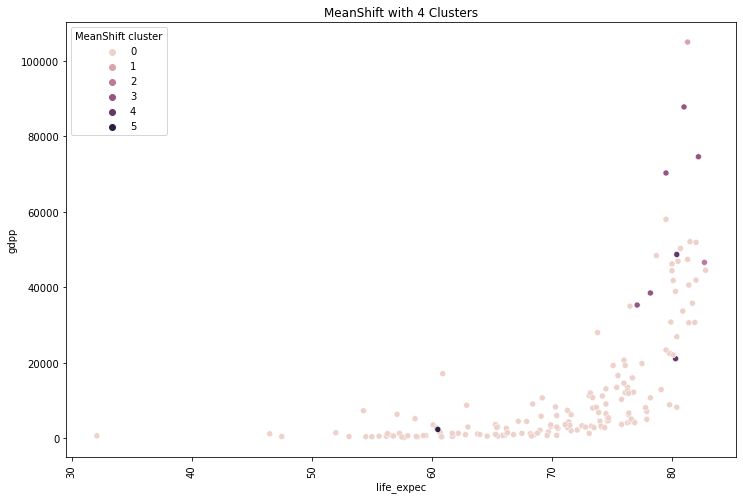

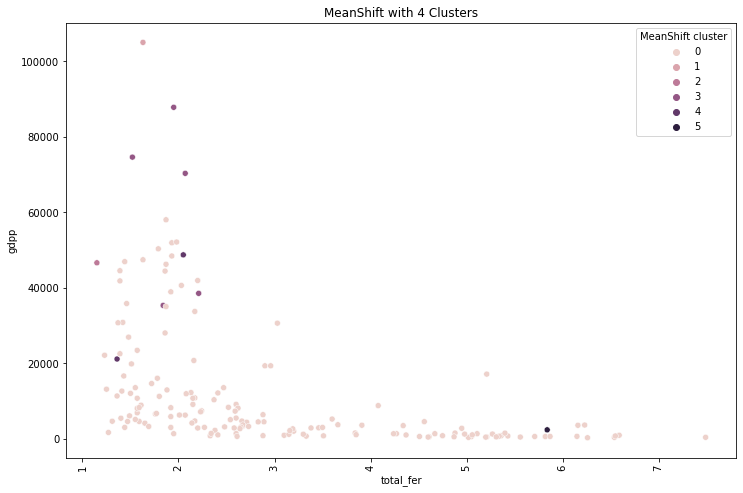

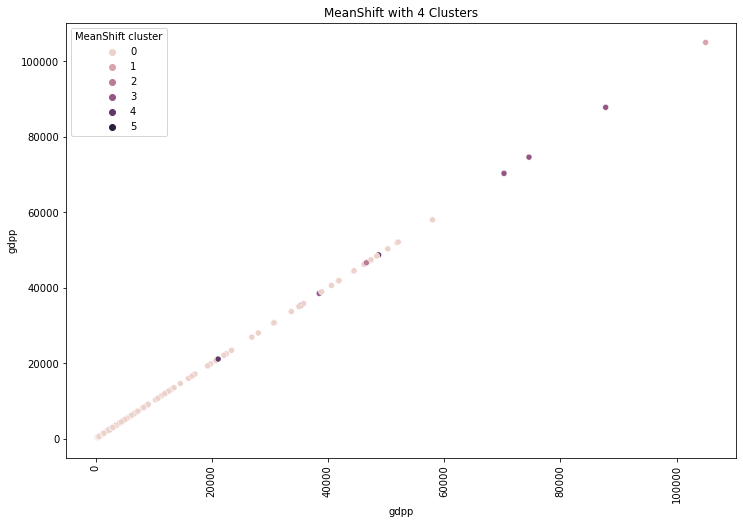

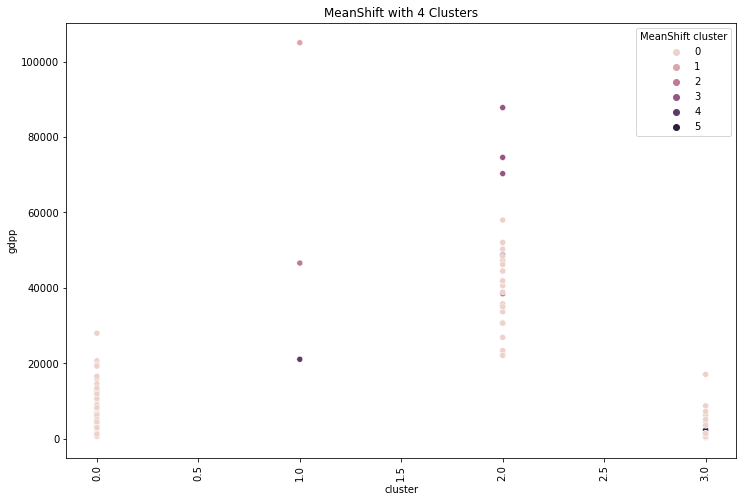

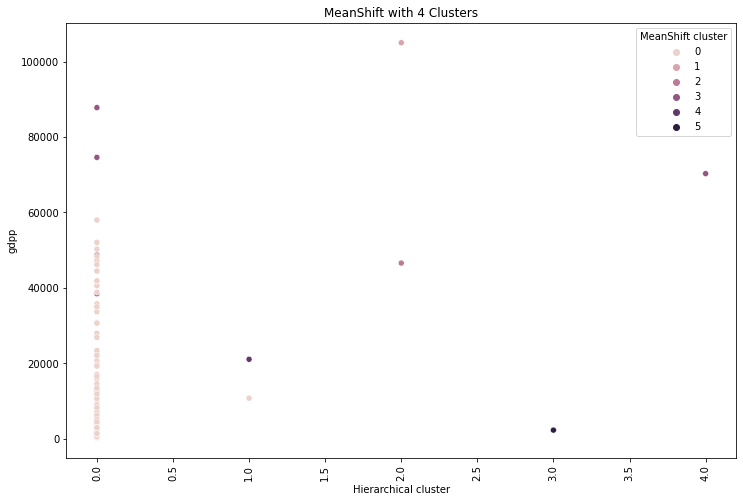

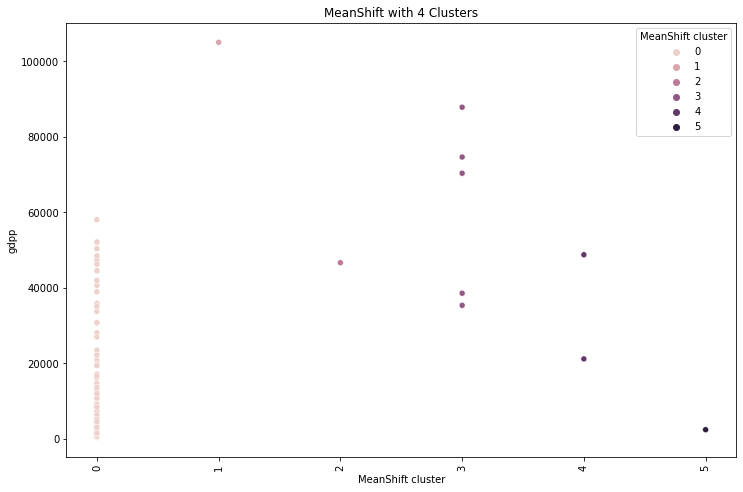

In [47]:
for col in df.columns : 
    plt.figure(figsize=(12, 8))
    sns.scatterplot(df[col], df['gdpp'], hue=df['MeanShift cluster'])
    plt.xticks(rotation=90)
    plt.title('MeanShift with 4 Clusters')
    plt.show()

## metrics

In [48]:
dbs_msh = metrics.davies_bouldin_score(df2, msh.labels_)
slc_msh = metrics.silhouette_score(df2, msh.labels_)
chc_msh = metrics.calinski_harabasz_score(df2, msh.labels_)

## Prediction

In [49]:
pred_msh = msh.fit_predict(df_scaled)
pred_msh

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1,
       0, 0, 0, 6, 0, 0, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [51]:
df[df["MeanShift cluster"]==0].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,Hierarchical cluster,MeanShift cluster
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.0
mean,39.531847,37.635662,6.849172,45.176853,14150.401274,7.326338,70.061146,2.998025,10412.636943,1.184713,0.006369,0.0
std,40.184000,19.733327,2.707745,18.976590,13417.140448,7.549877,8.810124,1.514449,13832.357806,1.362603,0.079809,0.0
min,2.600000,0.109000,1.970000,0.065900,609.000000,-4.210000,32.100000,1.230000,231.000000,0.000000,0.000000,0.0
25%,10.000000,22.800000,4.970000,30.800000,3280.000000,1.850000,64.600000,1.860000,1310.000000,0.000000,0.000000,0.0
50%,20.700000,33.200000,6.320000,43.300000,9860.000000,5.390000,72.100000,2.520000,4500.000000,0.000000,0.000000,0.0
75%,62.200000,50.500000,8.500000,58.100000,20100.000000,10.600000,76.400000,4.080000,12100.000000,3.000000,0.000000,0.0
max,208.000000,93.800000,17.900000,108.000000,57600.000000,45.900000,82.800000,7.490000,58000.000000,3.000000,1.000000,0.0


In [52]:
df[df["MeanShift cluster"]==1].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,Hierarchical cluster,MeanShift cluster
count,1.0,1.0,1.00,1.0,1.0,1.00,1.0,1.00,1.0,1.0,1.0,1.0
mean,2.8,175.0,7.77,142.0,91700.0,3.62,81.3,1.63,105000.0,1.0,2.0,1.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.8,175.0,7.77,142.0,91700.0,3.62,81.3,1.63,105000.0,1.0,2.0,1.0
25%,2.8,175.0,7.77,142.0,91700.0,3.62,81.3,1.63,105000.0,1.0,2.0,1.0
50%,2.8,175.0,7.77,142.0,91700.0,3.62,81.3,1.63,105000.0,1.0,2.0,1.0
75%,2.8,175.0,7.77,142.0,91700.0,3.62,81.3,1.63,105000.0,1.0,2.0,1.0
max,2.8,175.0,7.77,142.0,91700.0,3.62,81.3,1.63,105000.0,1.0,2.0,1.0


In [53]:
df[df["MeanShift cluster"]==2].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,Hierarchical cluster,MeanShift cluster
count,1.0,1.0,1.00,1.0,1.0,1.000,1.0,1.00,1.0,1.0,1.0,1.0
mean,2.8,200.0,3.96,174.0,72100.0,-0.046,82.7,1.15,46600.0,1.0,2.0,2.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.8,200.0,3.96,174.0,72100.0,-0.046,82.7,1.15,46600.0,1.0,2.0,2.0
25%,2.8,200.0,3.96,174.0,72100.0,-0.046,82.7,1.15,46600.0,1.0,2.0,2.0
50%,2.8,200.0,3.96,174.0,72100.0,-0.046,82.7,1.15,46600.0,1.0,2.0,2.0
75%,2.8,200.0,3.96,174.0,72100.0,-0.046,82.7,1.15,46600.0,1.0,2.0,2.0
max,2.8,200.0,3.96,174.0,72100.0,-0.046,82.7,1.15,46600.0,1.0,2.0,2.0


In [50]:
df[df["MeanShift cluster"]==3].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,Hierarchical cluster,MeanShift cluster
count,5.000000,5.0000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.0,5.000000,5.0
mean,7.600000,60.0200,5.652000,32.800000,79720.000000,8.229400,79.600000,1.918000,61300.00000,2.0,0.800000,3.0
std,3.520653,11.5437,4.490364,11.710465,27210.053289,6.122464,2.057912,0.261668,23216.26585,0.0,1.788854,0.0
min,3.200000,39.7000,1.810000,23.800000,55500.000000,0.317000,77.100000,1.520000,35300.00000,2.0,0.000000,3.0
25%,4.500000,62.3000,2.630000,28.000000,62300.000000,5.950000,78.200000,1.840000,38500.00000,2.0,0.000000,3.0
50%,9.000000,64.0000,2.840000,28.500000,75200.000000,6.980000,79.500000,1.950000,70300.00000,2.0,0.000000,3.0
75%,10.500000,66.7000,9.480000,30.400000,80600.000000,11.200000,81.000000,2.070000,74600.00000,2.0,0.000000,3.0
max,10.800000,67.4000,11.500000,53.300000,125000.000000,16.700000,82.200000,2.210000,87800.00000,2.0,4.000000,3.0


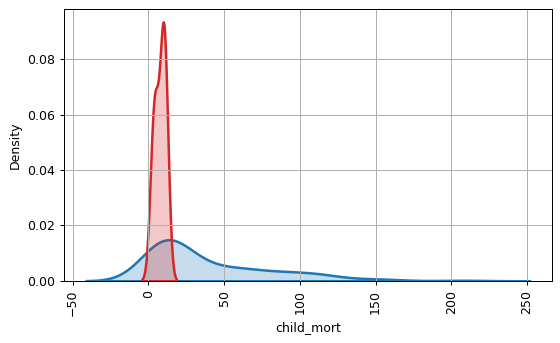

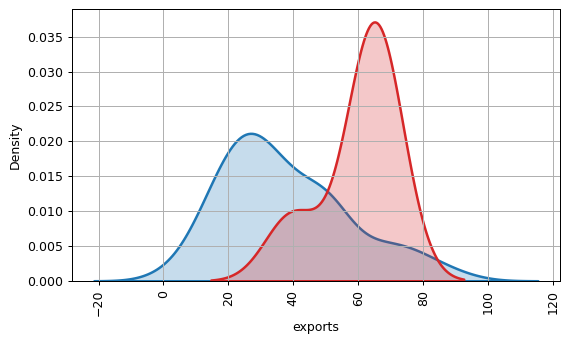

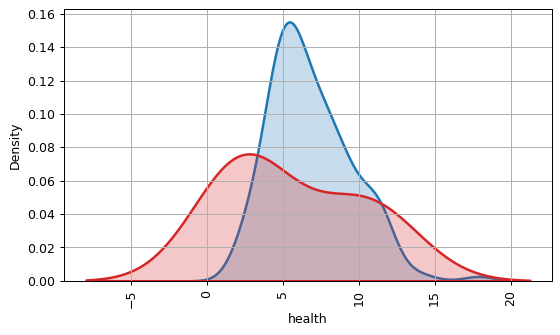

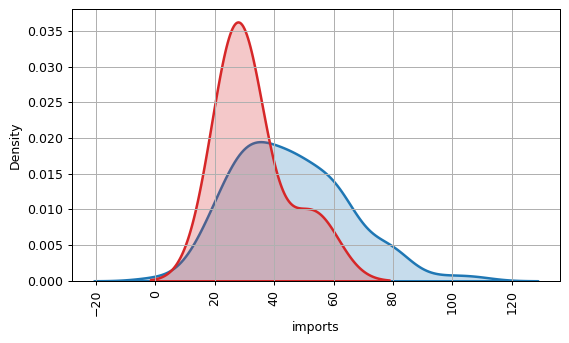

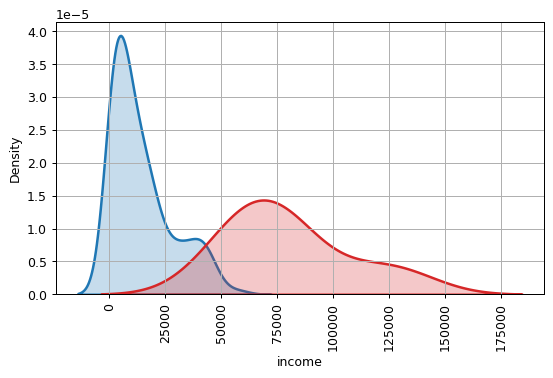

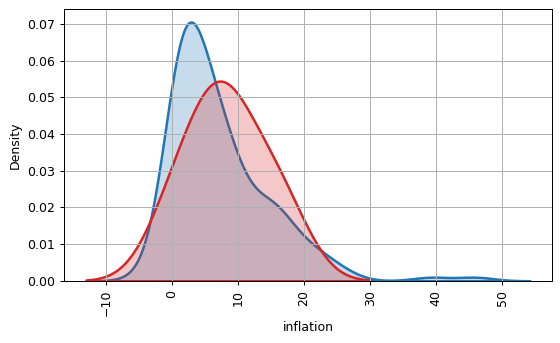

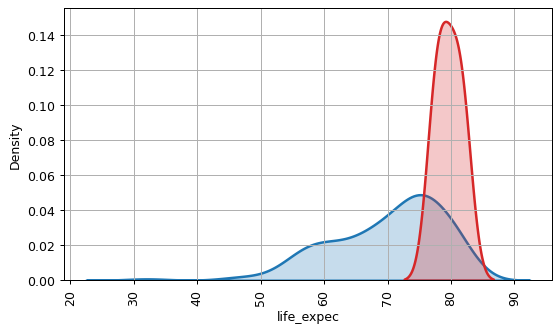

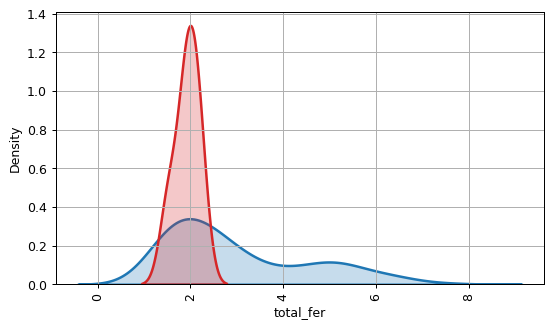

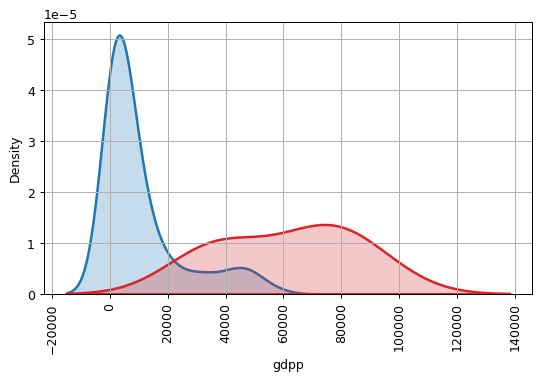

In [54]:
names = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']


for col in names :
    plt.figure(figsize=(7,4), dpi=90)
    sns.kdeplot(data=df[df["MeanShift cluster"]==0], x=col, fill=True, linewidth=2, label='0')
    sns.kdeplot(data=df[df["MeanShift cluster"]==1], x=col, fill=True, linewidth=2, label='1')
    sns.kdeplot(data=df[df["MeanShift cluster"]==2], x=col, fill=True, linewidth=2, label='2')
    sns.kdeplot(data=df[df["MeanShift cluster"]==3], x=col, fill=True, linewidth=2, label='3')
    plt.xticks(rotation=90)
    plt.grid()

Text(0.5, 1.0, 'Number of countries in each cluster')

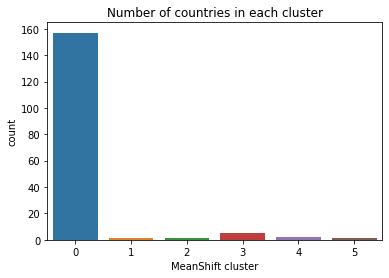

In [55]:
sns.countplot(x="MeanShift cluster", data=df)
plt.title("Number of countries in each cluster")

In [56]:
pd.Series(pred_msh).value_counts()

0    152
1      6
3      4
4      2
6      1
2      1
5      1
dtype: int64

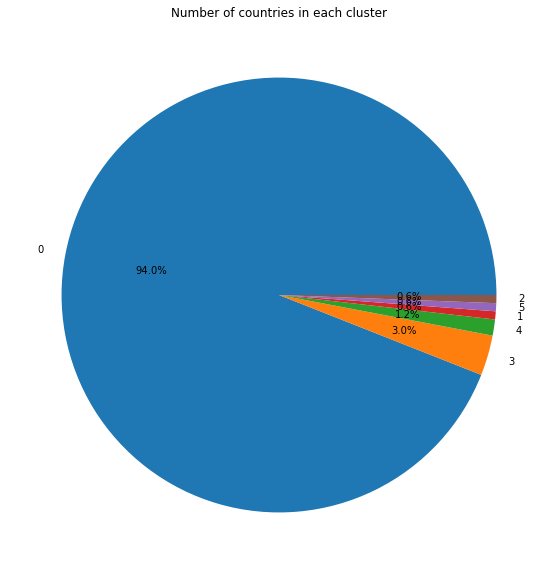

In [57]:
s = df["MeanShift cluster"].value_counts()

plt.figure(figsize=(10,10))
plt.pie(s,labels = s.index, autopct='%1.1f%%')
plt.title("Number of countries in each cluster")
plt.show()

### PCA Clustering using Hierarchical algorithm :
1. There are 4 clusters.
2. Cluster 4 has the smallest amount of countries(samples).
3. Cluster 0 has the largest amount of countris(samples).

# 

# 8.Comparing Models

In [59]:
best_model = pd.DataFrame({'Model_Name':['KMeans', 'meanShift','Heirarichicaal'],
                           'Sil_score':[slc_kmeans, slc_msh, slc_agglom],
                           'CH_score':[chc_kmeans, chc_msh, chc_agglom], 
                           'dbs_score':[dbs_kmeans, dbs_msh, dbs_agglom]})

In [60]:
best_model

,Model_Name,Sil_score,CH_score,dbs_score
0,KMeans,0.200476,128.474328,1.811186
1,meanShift,-0.552526,27.286005,1.311341
2,Heirarichicaal,-0.618189,15.254275,1.535562


## KMeans is working better.

In [75]:
mean_dict = {"Cluster 0":(df[df["cluster"]==0]).mean(),
             "Cluster 1":(df[df["cluster"]==1]).mean(),
             "Cluster 2":(df[df["cluster"]==2]).mean(),
             "Cluster 3":(df[df["cluster"]==3]).mean()}

In [76]:
mean_df = pd.DataFrame(mean_dict)
mean_df

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
child_mort,21.389655,4.133333,4.953333,92.961702
exports,41.290678,176.000000,45.826667,29.151277
health,6.235862,6.793333,9.168667,6.388511
imports,48.038689,156.666667,39.736667,42.323404
income,12968.620690,64033.333333,45250.000000,3942.404255
inflation,7.413460,2.468000,2.742200,12.019681
life_expec,72.935632,81.433333,80.376667,59.187234
total_fer,2.286552,1.380000,1.795333,5.008085
gdpp,6919.103448,57566.666667,43333.333333,1922.382979
cluster,0.000000,1.000000,2.000000,3.000000


###    
1. Cluster 0 are very less developed countries.
2. Cluster 3 are less developed countries.
3. Cluster 2 are little developing countries.
4. Cluster 1 are developing countries